<a href="https://colab.research.google.com/github/NikitaDash/SeoulBikeData-Regression-project/blob/main/SeoulBikeData_Regression_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Seoul Bike Sharing Demand Prediction**

## **Project Type** = Regression

## **Contribution**= Nikita Dash

#**Project** **Summery**
This project revolves around predictive modeling for Seoul's bike rental demand, leveraging a dataset comprising 8,760 rows and 14 columns. The workflow adheres to a systematic and formal structure, commencing with data collection and preliminary analysis to ascertain the dataset's fundamental characteristics, including its dimensions and data types. Subsequently, data filtering and cleaning are executed to enhance data quality by eliminating superfluous columns and addressing missing values.

The project progresses to Exploratory Data Analysis (EDA), where insightful visualizations are generated to illuminate relationships between dependent and independent variables. This phase also encompasses an analysis of mean distributions and correlations between columns. With a well-informed understanding of the data, attention shifts towards data preparation, encompassing feature engineering, encoding, and the division of data into training and testing sets.

Data scaling ensures optimal model performance. Model selection is a deliberate process aimed at choosing the most suitable algorithm. Model evaluation employs various metrics to gauge model performance, with hyperparameter tuning employed to enhance accuracy and mitigate overfitting. Ultimately, a comprehensive comparison between test and train data illuminates the model's performance and errors, ensuring a robust predictive model for Seoul's bike rental demand.

# **1. Problem description**
The Seoul bike sharing demand data set is hosted in the UCI Machine Learning Repository. The data set contains the count of the number of bikes rented at each hour in the Seoul bike-sharing system and information regarding weather conditions.

The final product will consist of a model that predicts the number of bicycles rented in any given day based on the hour and other weather-related variables such as rainfall and humidity. The system’s predictions are used to guarantee that available bikes will meet the demand for the service.

# **Data Description**
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

## **Attribute Information:**
Date : year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of he day

Temperature-Temperature in Celsius

Humidity - %

Windspeed - m/s

Visibility - 10m

Dew point temperature - Celsius

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Importing libraries and Data loading**

In [ ]:
# Import necessary libraries

import pandas as pd     #provides wide variety tools for data analysis,many inbuilt methods for grouping, combining and filtering data.
import numpy as np      #for some basic mathematical operations
from matplotlib import pyplot as plt #comprehensive library for creating static, animated, and interactive visualizations
import seaborn as sns                #  high-level interface for drawing attractive and informative statistical graphics

from sklearn.model_selection import train_test_split, GridSearchCV,  cross_val_score
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn import tree

import xgboost as xgb
from xgboost import plot_importance

from lightgbm import LGBMRegressor

import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns',None)
%matplotlib inline

In [ ]:
#data loading
from google.colab import files
scores_file = files.upload()

Saving SeoulBikeData.csv to SeoulBikeData.csv


In [ ]:
import io
import pandas as pd
data = pd.read_csv(io.BytesIO(scores_file['SeoulBikeData.csv']),encoding='unicode_escape') #since the data set contains non-ASCII characters 'encoding' is requiered
print(data.sample(10))

            Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
5189  05/07/2018                326     5             23.5           80   
6222  17/08/2018                719     6             21.8           51   
6636  03/09/2018                673    12             23.9           83   
322   14/12/2017                189    10             -7.7           43   
6067  10/08/2018               1903    19             33.4           49   
6510  29/08/2018                346     6             24.7           85   
8336  13/11/2018               1910     8              4.7           68   
7668  16/10/2018               1063    12             18.8           35   
4352  31/05/2018               2281     8             16.9           65   
5039  28/06/2018                931    23             21.7           96   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
5189               0.3               838                       19.8   
6222               2.0          

In the table below, we can observe how each row represents a different day. The various attributes include the date, number of bikes rented on a given day and wheater-related information.

In [ ]:
#Data view
data.head(10)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   
5  01/12/2017                100     5             -6.4           37   
6  01/12/2017                181     6             -6.6           35   
7  01/12/2017                460     7             -7.4           38   
8  01/12/2017                930     8             -7.6           37   
9  01/12/2017                490     9             -6.5           27   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   
5               1.5              2000                      -18.7   
6               1.3              2000                      -19.5   
7               0.9              2000                      -19.3   
8               1.1              2000                      -19.8   
9               0.5              1928                      -22.4   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                     0.00           0.0            0.0  Winter  No Holiday   
1                     0.00           0.0            0.0  Winter  No Holiday   
2                     0.00           0.0            0.0  Winter  No Holiday   
3                     0.00           0.0            0.0  Winter  No Holiday   
4                     0.00           0.0            0.0  Winter  No Holiday   
5                     0.00           0.0            0.0  Winter  No Holiday   
6                     0.00           0.0            0.0  Winter  No Holiday   
7                     0.00           0.0            0.0  Winter  No Holiday   
8                     0.01           0.0            0.0  Winter  No Holiday   
9                     0.23           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes  
5             Yes  
6             Yes  
7             Yes  
8             Yes  
9             Yes

In [ ]:
#information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

we can observe from the above table that the dataset has 8760 rows, and none of the attributes presents missing values. Another observation is that only the Date, Seasons, Holiday and Functioning day attributes are type object.

Let's get sumeery of all numerical values

In [ ]:
data.describe(include = 'all')

Date  Rented Bike Count         Hour  Temperature(°C)  \
count         8760        8760.000000  8760.000000      8760.000000   
unique         365                NaN          NaN              NaN   
top     01/12/2017                NaN          NaN              NaN   
freq            24                NaN          NaN              NaN   
mean           NaN         704.602055    11.500000        12.882922   
std            NaN         644.997468     6.922582        11.944825   
min            NaN           0.000000     0.000000       -17.800000   
25%            NaN         191.000000     5.750000         3.500000   
50%            NaN         504.500000    11.500000        13.700000   
75%            NaN        1065.250000    17.250000        22.500000   
max            NaN        3556.000000    23.000000        39.400000   

        Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
count   8760.000000       8760.000000       8760.000000   
unique          NaN               NaN               NaN   
top             NaN               NaN               NaN   
freq            NaN               NaN               NaN   
mean      58.226256          1.724909       1436.825799   
std       20.362413          1.036300        608.298712   
min        0.000000          0.000000         27.000000   
25%       42.000000          0.900000        940.000000   
50%       57.000000          1.500000       1698.000000   
75%       74.000000          2.300000       2000.000000   
max       98.000000          7.400000       2000.000000   

        Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
count                 8760.000000              8760.000000   8760.000000   
unique                        NaN                      NaN           NaN   
top                           NaN                      NaN           NaN   
freq                          NaN                      NaN           NaN   
mean                     4.073813                 0.569111      0.148687   
std                     13.060369                 0.868746      1.128193   
min                    -30.600000                 0.000000      0.000000   
25%                     -4.700000                 0.000000      0.000000   
50%                      5.100000                 0.010000      0.000000   
75%                     14.800000                 0.930000      0.000000   
max                     27.200000                 3.520000     35.000000   

        Snowfall (cm) Seasons     Holiday Functioning Day  
count     8760.000000    8760        8760            8760  
unique            NaN       4           2               2  
top               NaN  Spring  No Holiday             Yes  
freq              NaN    2208        8328            8465  
mean         0.075068     NaN         NaN             NaN  
std          0.436746     NaN         NaN             NaN  
min          0.000000     NaN         NaN             NaN  
25%          0.000000     NaN         NaN             NaN  
50%          0.000000     NaN         NaN             NaN  
75%          0.000000     NaN         NaN             NaN  
max          8.800000     NaN         NaN             NaN

In [ ]:
#checking of columns
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
#duplicacy checking
len(data[data.duplicated()])

0

In [ ]:
# analysing how many rows and columns present
data.shape

(8760, 14)

In [ ]:
# Checking for total null values in each column

data.isnull().sum().sort_values(ascending=False)

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Finding details from data:

1. There are 14 features with 8760 rows of data.

2. There are 4 categorical columns and 10 numerical columns.

3. Columns ‘Date’, ‘Seasons’ and ‘Functioning Day’ are of 𝑜𝑏𝑗𝑒𝑐𝑡 data type.

4. Columns ‘Rented Bike Count’, ‘Hour’, ‘Humidity (%)' and ‘Visibility (10𝑚)' are of 𝑖𝑛𝑡64 numarical data type.

5. Columns ‘Temperature Temperature (℃)’, ‘Wind Speed (𝑚/𝑠)’, ‘Dew Point Temperature (℃)’,‘Solar Radiation (𝑀𝐽/𝑚2)’,‘Rainfall (𝑚𝑚)' and ‘Snowfall(𝑐𝑚) are of 𝑓𝑙𝑜𝑎𝑡64 numarical data type
6. Not any null value present in any column
7. Unique count : Seasons- 4 , Holiday- 2 , Functioning Day- 2

# **Data Filtering**

In [ ]:
#creat a copy of dataset before handling data
Bike_data = data.copy()

### Rented Bike days Filtering

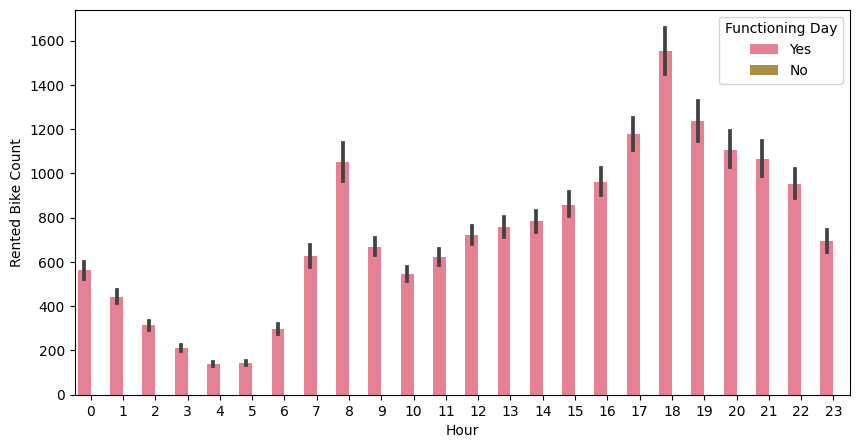

In [ ]:
#for check functioning and non functioning day ,plot (Hour Vs Rented Bike Count Graph)
def barplots(x,y,hue):
    plt.figure(figsize=(10,5))
    sns.set_palette("husl")
    sns.barplot(x=x,y=y,hue=hue,data= Bike_data);
barplots('Hour','Rented Bike Count','Functioning Day')

In [ ]:
# Grouping by functioning day and calculating the total Rented Bike Count
Bike_data.groupby('Functioning Day').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index()

Functioning Day  Rented Bike Count
0             Yes            6172314
1              No                  0

As per diagnosis data found that rental bike only given on Functioning Day,So remove Non Functioning Days and then remove Functioning Day Column Also.

In [ ]:
#Removing data of non functional days (non rented days)
Bike_data = Bike_data.drop(Bike_data[Bike_data['Functioning Day'] == 'No'].index)

In [ ]:
#Due to not unsefull in Functioning Day Column ,remove Functioning Day Column
Bike_data =Bike_data.drop(['Functioning Day'], axis = 1)

#Checking DataFrame Shape After Removing Non Functional Day Rows And Functional Day Column
print("Filtered Dataframe with only rented bike days :",Bike_data.shape,"\n")

Filtered Dataframe with only rented bike days : (8465, 13) 



# **Exploratory Data Analysis**

Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "Rented Bike count" and other columns.

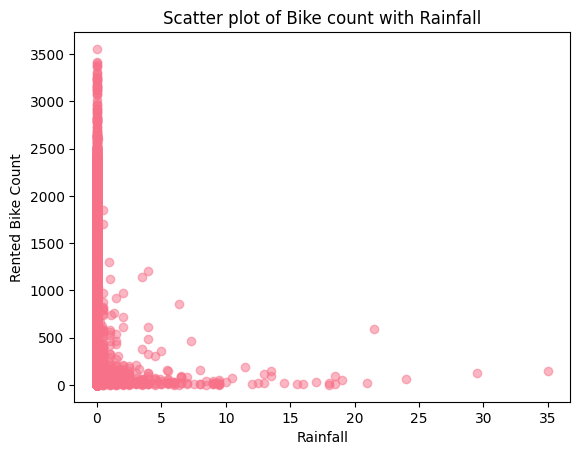

In [ ]:
#graph between Rented Bike count and Rainfall
plt.scatter(data['Rainfall(mm)'], data['Rented Bike Count'], alpha=0.5)
plt.title('Scatter plot of Bike count with Rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Rented Bike Count')
plt.show()

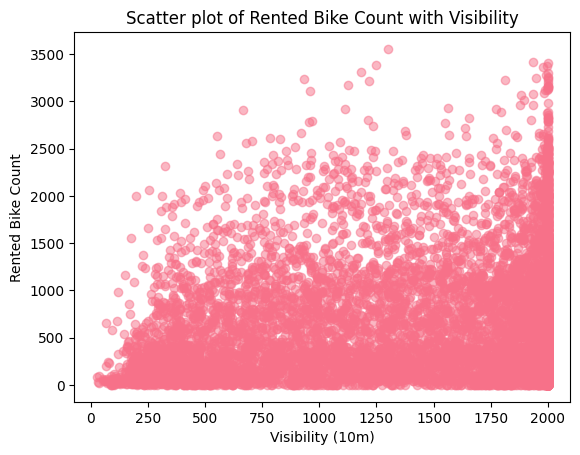

In [ ]:
##graph between Rented Bike count and Visibility
plt.scatter(data['Visibility (10m)'], data['Rented Bike Count'], alpha=0.5)
plt.title('Scatter plot of Rented Bike Count with Visibility')
plt.xlabel('Visibility (10m)')
plt.ylabel('Rented Bike Count')
plt.show()

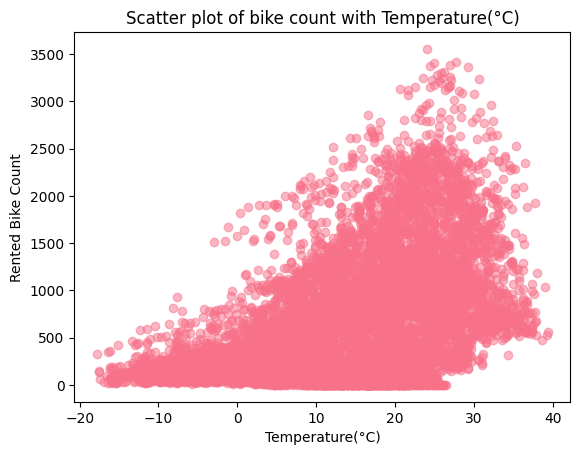

In [ ]:
#graph between Rented Bike count and Tempreture
plt.scatter(data['Temperature(°C)'], data['Rented Bike Count'], alpha=0.5)
plt.title('Scatter plot of bike count with Temperature(°C)')
plt.xlabel('Temperature(°C)')
plt.ylabel('Rented Bike Count')
plt.show()

<Axes: xlabel='Rented Bike Count', ylabel='Density'>

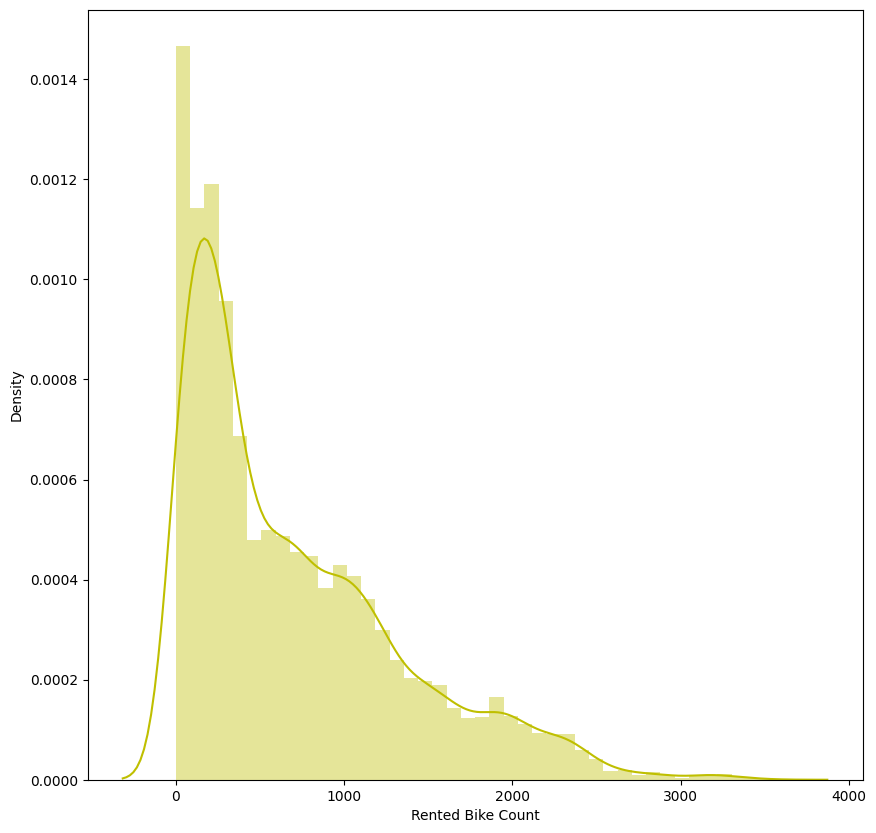

In [ ]:
# Dependent variable 'Rented Bike Count'
plt.figure(figsize=(10,10))
sns.distplot(data['Rented Bike Count'],color="y")

From the above graph we can see that the dependent variable column is right skwed

###Let's observe the numerical attributes distribution

In [ ]:
numeric_features = data.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

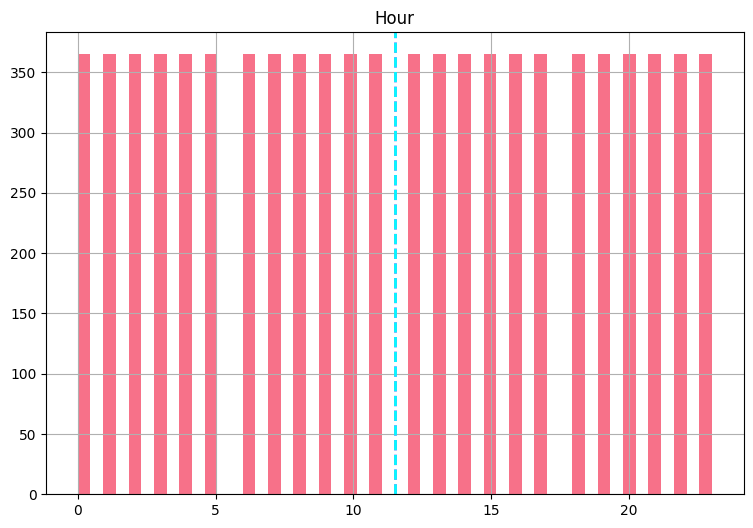

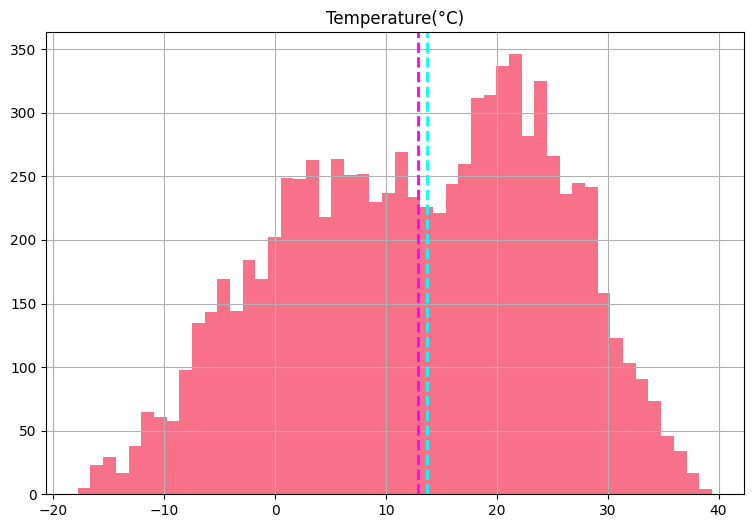

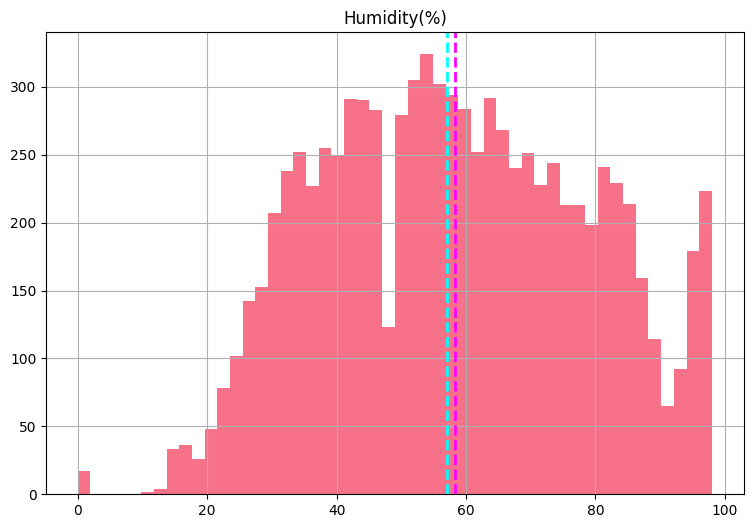

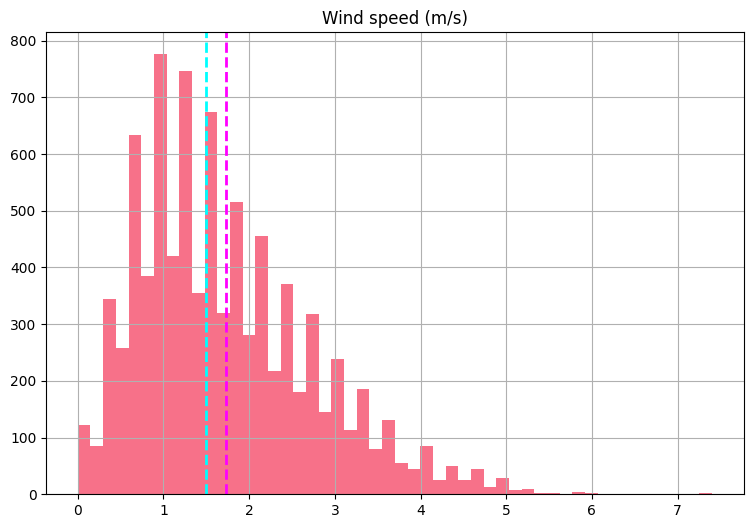

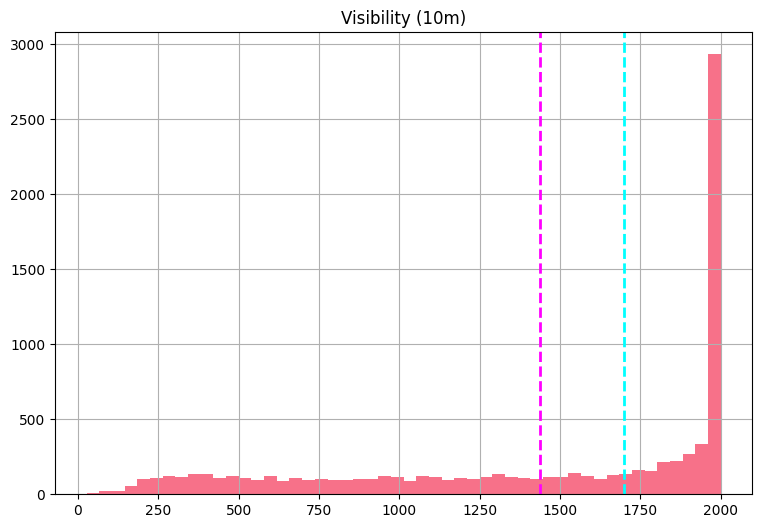

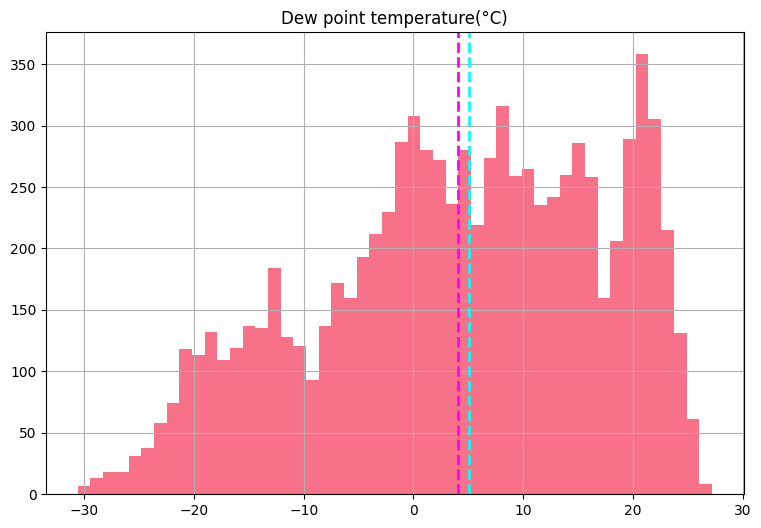

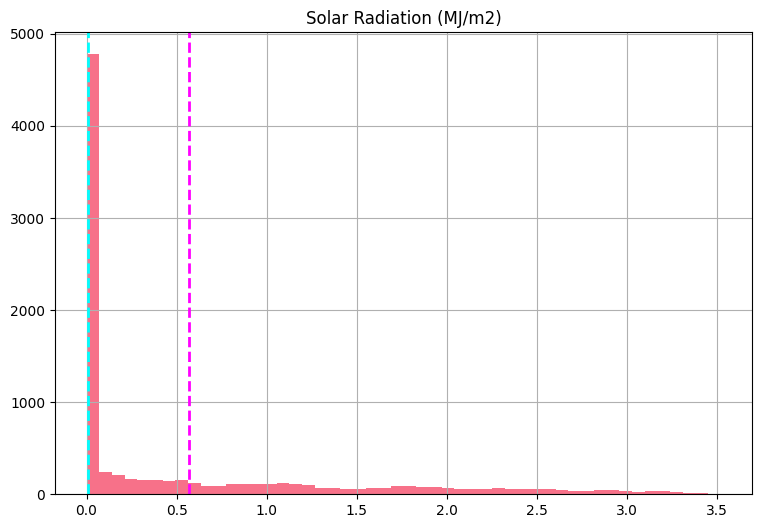

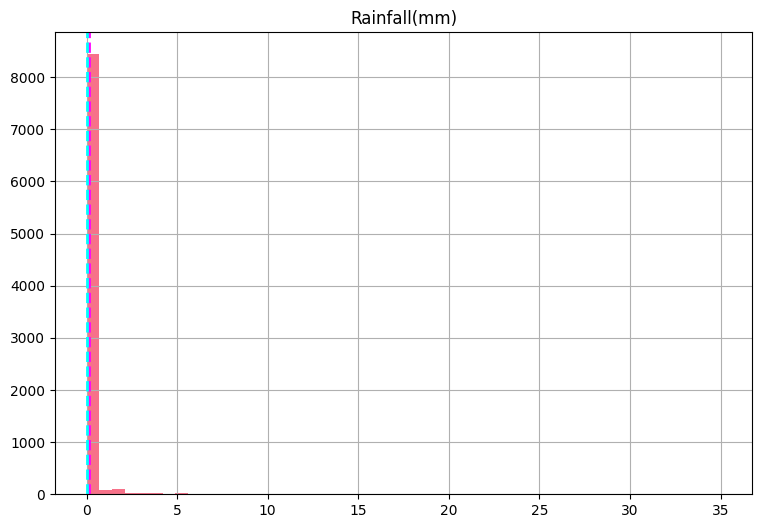

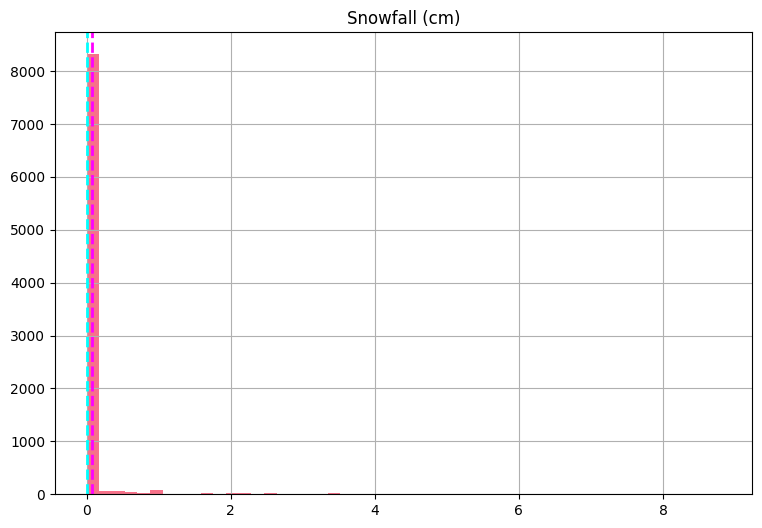

In [ ]:
#plot for numerical attributions
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

By seeing the above histogram. Some of the features that we can notice in our histograms are:

1. Some of the histograms are tail heavy.
2. All the attributes have different scales.

Both findings tell us that we will require to normalise the attributes further.

Let's check the dependent variable distribution with respect to the independent variable. like is the data distribution Linear or not.

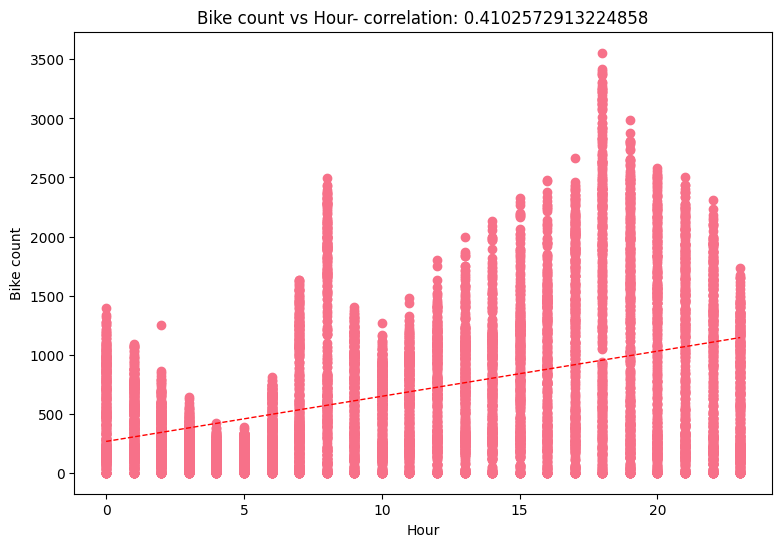

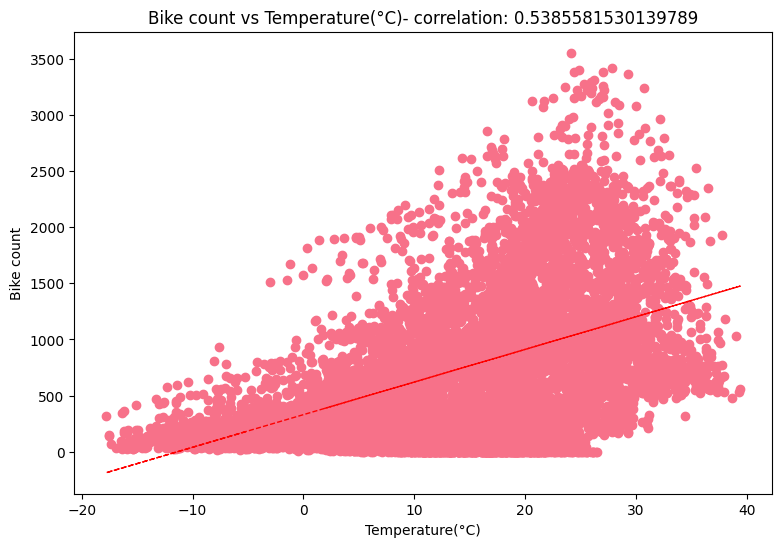

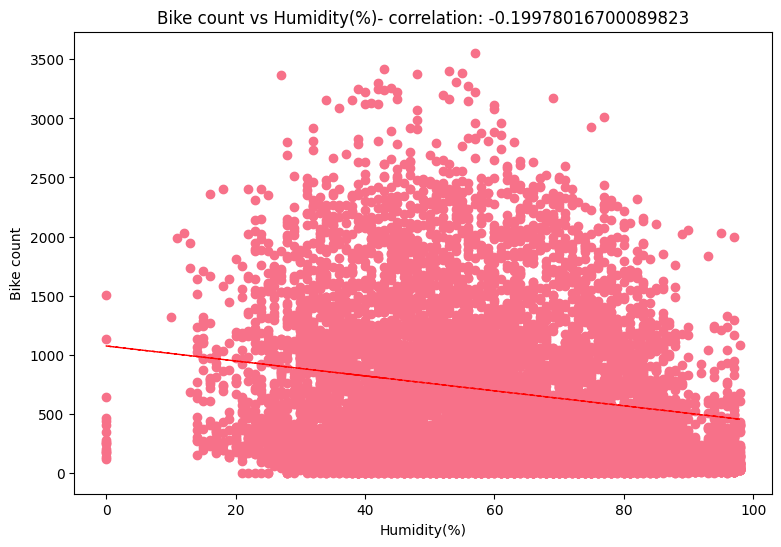

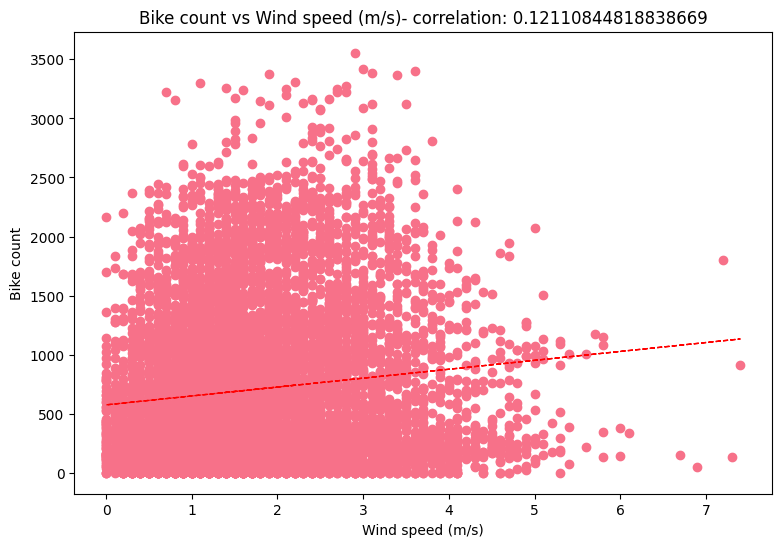

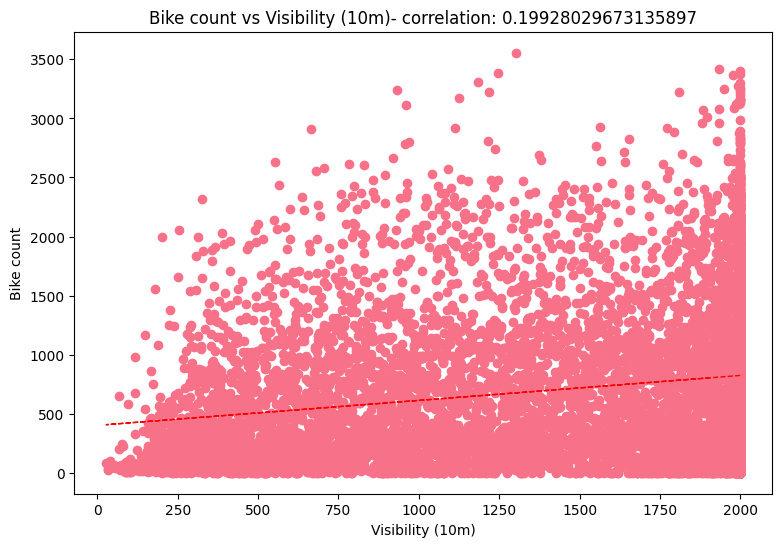

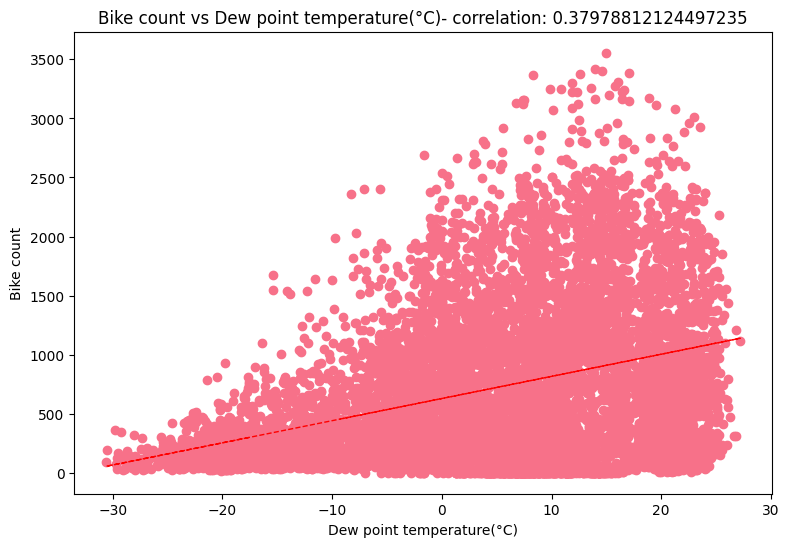

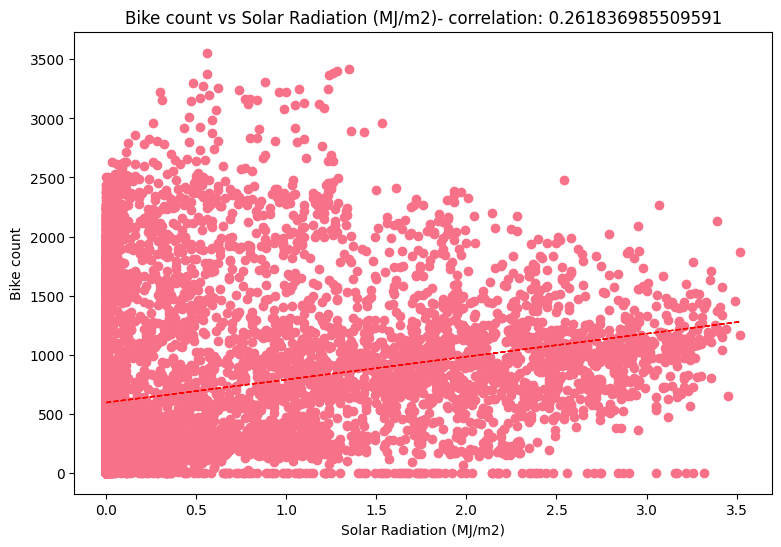

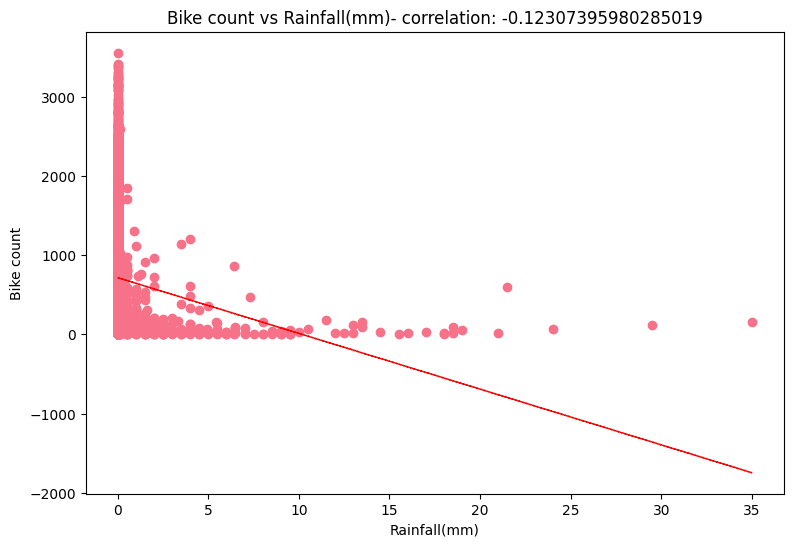

In [ ]:
#to check the data distribution
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    label = data['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Bike count')
    ax.set_title('Bike count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(data[col], data['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(data[col])

    plt.plot(data[col], y_hat, "r--", lw=1)

plt.show()

From the above distribution we can conclude that some data are not linearly distributed with respect to dependent variable and nearly linearly related and rainfall data is negatively linearly related. so we need to prepare the data by make some transformation before applying the model.

### Checking Correlation Of Data
Correlation is a statistical measure that expresses the strength of the relationship between two variables.

The two main types of correlation : positive and negative.

Positive correlation occurs when two variables move in the same direction; as one increases, so do the other.

Negative correlation occurs when two variables move in opposite directions; as one increases, the other decreases.

Correlation can be used to test hypotheses about cause and effect relationships between variables. Correlation is often used in the real world to predict trends.

<Axes: >

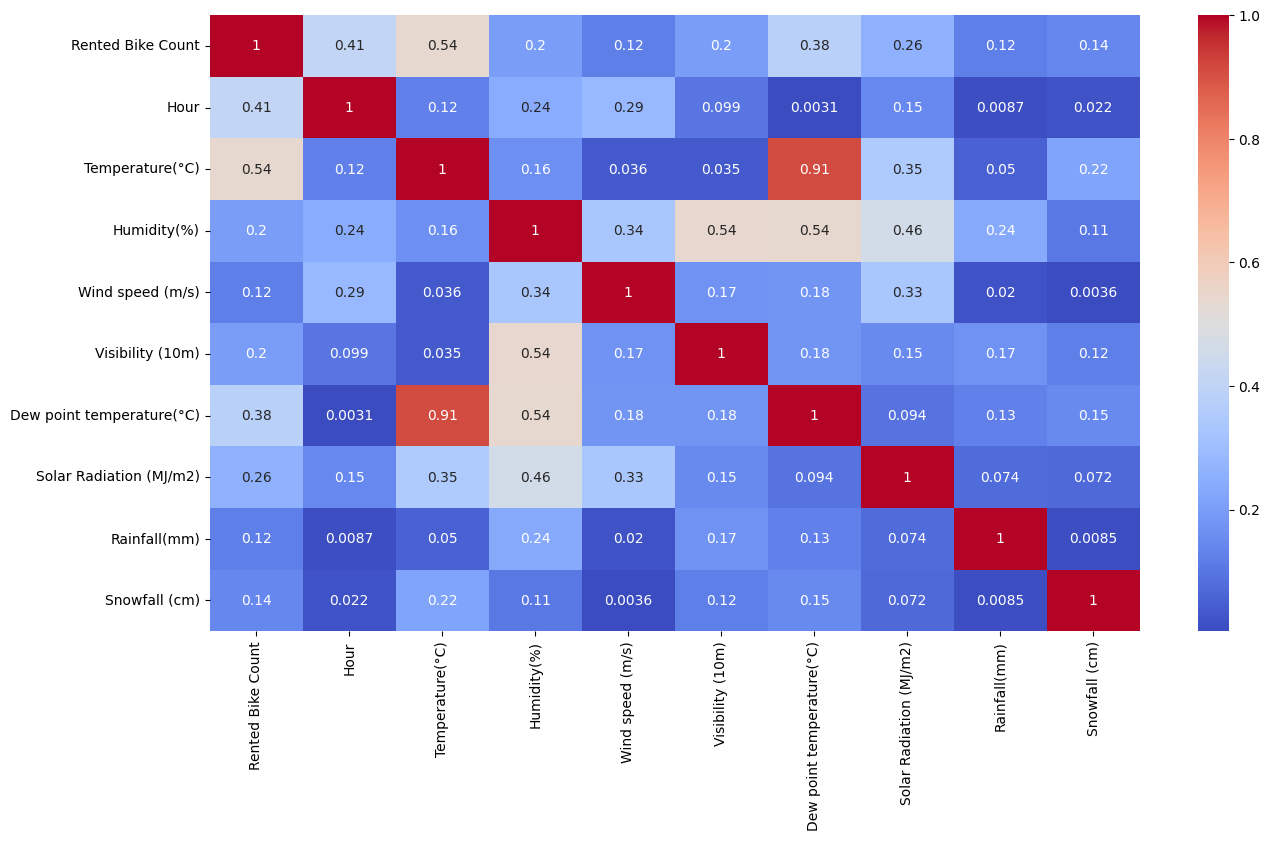

In [ ]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = data.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

temperature and Dew point temperature are almost 0.91 correlated, So it's generate multicollinearity issue. so we drop Dew point temperature feature

In [ ]:
#Drop Dew point temperature(°C) from dataset df1
Bike_data.drop(columns=['Dew point temperature(°C)'],inplace=True)

# **Data Preparation**

Nuemerical Variable

In [ ]:
numeric_features = Bike_data.describe().columns
print(numeric_features)

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')


Categorical variable

In [ ]:
#For categorical Data
categorical_features=[col for col in Bike_data.columns if Bike_data[col].dtype=='O']
categorical_features

['Date', 'Seasons', 'Holiday']

In [ ]:
#convert in datetime64[ns] datatype
Bike_data['Date'] = pd.to_datetime(Bike_data['Date'])
Bike_data['Date']

0      2017-01-12
1      2017-01-12
2      2017-01-12
3      2017-01-12
4      2017-01-12
          ...    
8755   2018-11-30
8756   2018-11-30
8757   2018-11-30
8758   2018-11-30
8759   2018-11-30
Name: Date, Length: 8465, dtype: datetime64[ns]

In [ ]:
#Seperate Day, Month, Year from DataFrame Column

Bike_data['Day']= Bike_data['Date'].dt.day
Bike_data['Month']=Bike_data['Date'].dt.month
Bike_data['Year']=Bike_data['Date'].dt.year

In [ ]:
 #drop the Date column after extracting necessory information
Bike_data.drop(columns=['Date'],inplace=True)

In [ ]:
categorical_features1=[col for col in Bike_data.columns if Bike_data[col].dtype=='O']
categorical_features1


['Seasons', 'Holiday']

In [ ]:
# Seprate dataframe for Categorical feature
cat_data=Bike_data[categorical_features1]

In [ ]:
# Unique number of categorical features
for feature in categorical_features1:
    print('The feature is {} and number of categories are {}'.format(feature,len(Bike_data[feature].unique())))

The feature is Seasons and number of categories are 4
The feature is Holiday and number of categories are 2


In [ ]:
 #GROUPING BY SEASONS AND CALCULATING THE TOTAL RENTED BIKE COUNT
Bike_data.groupby('Seasons').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index()

Seasons  Rented Bike Count
0  Summer            2283234
1  Autumn            1790002
2  Spring            1611909
3  Winter             487169

In [ ]:
# GROUPING BY HOLIDAY AND CALCULATING THE TOTAL RENTED BIKE COUNT
Bike_data.groupby('Holiday').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index()

Holiday  Rented Bike Count
0  No Holiday            5956419
1     Holiday             215895

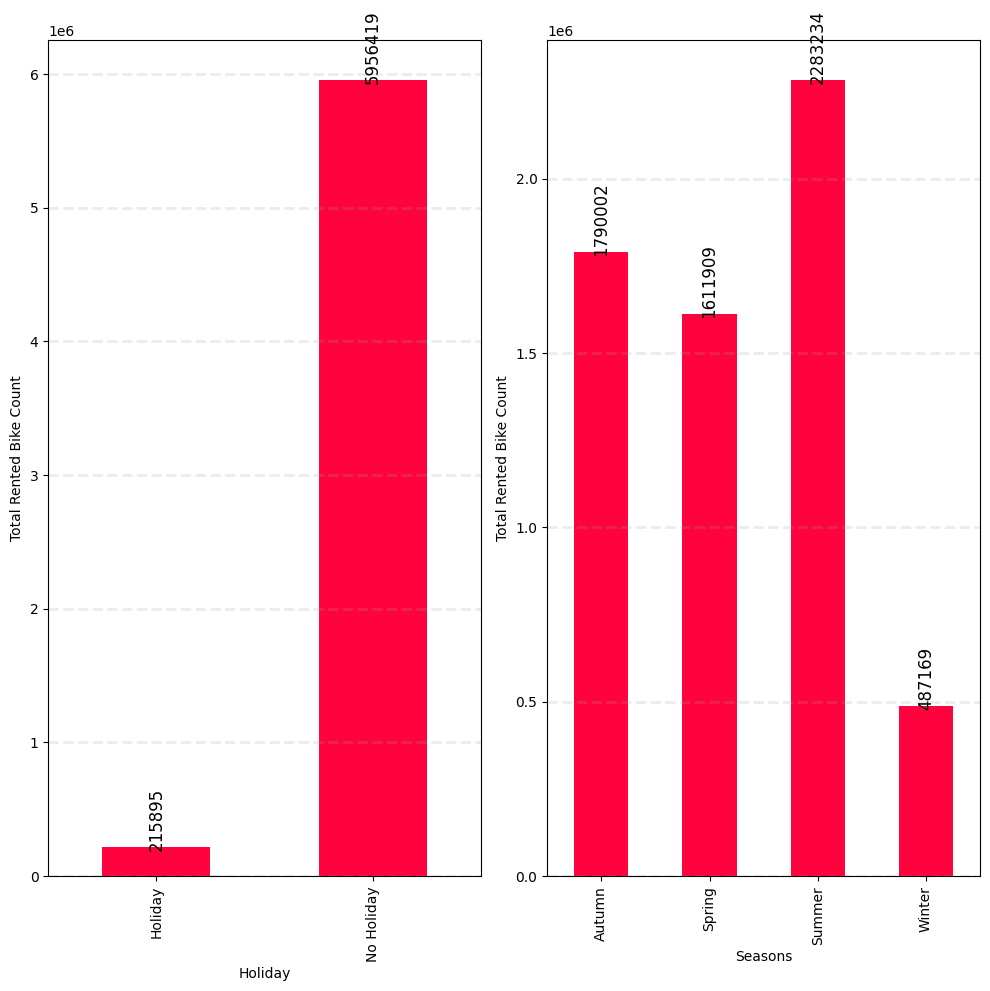

In [ ]:
#Find out the relationship between categorical variable and dependent feature Rented Bike Count

fig = plt.figure(figsize = (10,10))
for index,column in enumerate(categorical_features1) :
    plt.subplot(1,2,index+1)
    dataset=Bike_data.copy()
    dataset.groupby(feature)['Rented Bike Count'].sum().plot(kind='bar',color="#ff033e")
    feature = Bike_data[column]
    ax = fig.gca()
    plt.ylabel('Total Rented Bike Count')
    plt.tight_layout()
    plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.2)
    for p in ax.patches:
        ax.annotate(round(p.get_height()),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 12, rotation=90)

In Holidays the count of rented bike is low as compared to non-holidays.

In winter the rented bike count is very low.

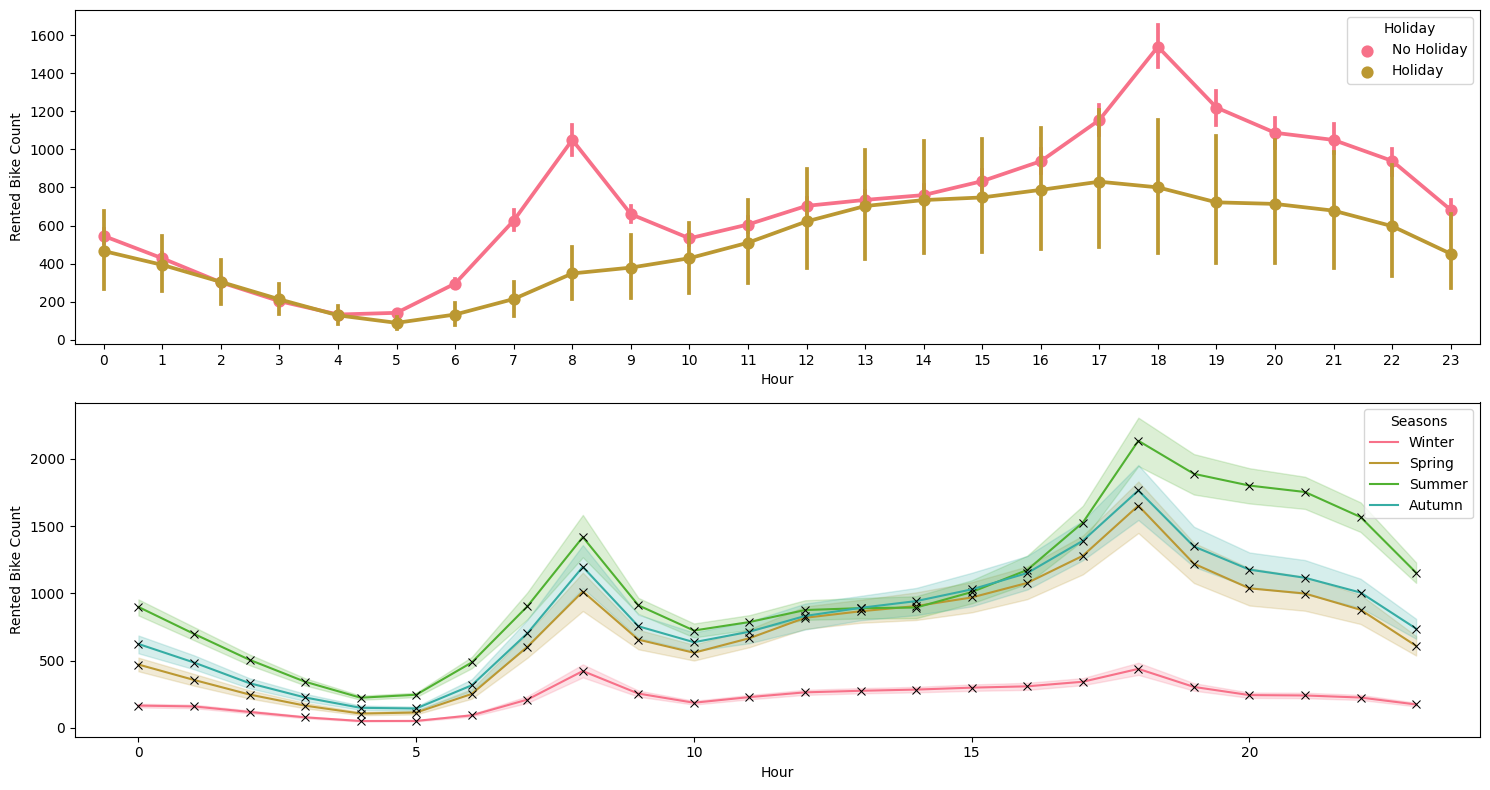

In [ ]:
fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(15,8), dpi=100)
sns.pointplot(data=data, x="Hour", y="Rented Bike Count", ax=axs[0],
              hue="Holiday")
sns.lineplot(data=data, x="Hour", y="Rented Bike Count", ax=axs[1],
              hue="Seasons", marker="x",markeredgecolor="black")
plt.tight_layout()

# **Feature Engineering On Data**

1. Encode categorical data into one-hot vectors.
2. Identify Inputs and Target
3. Scale values in numeric columns to a (0,1)
  range.
4.Split the dataset into training and validation sets.

### Encoding Data
Encode categorical data in both encoder and check accuracy of encoders:

one_df : OneHotEncoder Data

label_df : LabelEncoder Data

Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column.one-hot encoding approach eliminates the order but it causes the number of columns to expand vastly. So for columns with more unique values we try using other techniques like LabelEncoding

In [ ]:
#Applying LabelEncording
#Encode labels of multiple columns at ones using LabelEncoder
label_df= Bike_data.apply(LabelEncoder().fit_transform)
label_df

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                   252     0              111           28                22   
1                   202     1              108           29                 8   
2                   171     2              103           30                10   
3                   105     3              101           31                 9   
4                    76     4              103           27                23   
...                 ...   ...              ...          ...               ...   
8755                990    19              205           25                26   
8756                754    20              197           28                23   
8757                685    21              189           30                 3   
8758                703    22              184           32                10   
8759                579    23              182           34                13   

      Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0                 1779                        0             0              0   
1                 1779                        0             0              0   
2                 1779                        0             0              0   
3                 1779                        0             0              0   
4                 1779                        0             0              0   
...                ...                      ...           ...            ...   
8755              1673                        0             0              0   
8756              1779                        0             0              0   
8757              1747                        0             0              0   
8758              1639                        0             0              0   
8759              1688                        0             0              0   

      Seasons  Holiday  Day  Month  Year  
0           3        1   11      0     0  
1           3        1   11      0     0  
2           3        1   11      0     0  
3           3        1   11      0     0  
4           3        1   11      0     0  
...       ...      ...  ...    ...   ...  
8755        0        1   29     10     1  
8756        0        1   29     10     1  
8757        0        1   29     10     1  
8758        0        1   29     10     1  
8759        0        1   29     10     1  

[8465 rows x 14 columns]

Checking Season Column Data

In [ ]:
#for checking raw data
Bike_data.groupby("Seasons").count()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
Seasons                                                          
Autumn                1937  1937             1937         1937   
Spring                2160  2160             2160         2160   
Summer                2208  2208             2208         2208   
Winter                2160  2160             2160         2160   

         Wind speed (m/s)  Visibility (10m)  Solar Radiation (MJ/m2)  \
Seasons                                                                
Autumn               1937              1937                     1937   
Spring               2160              2160                     2160   
Summer               2208              2208                     2208   
Winter               2160              2160                     2160   

         Rainfall(mm)  Snowfall (cm)  Holiday   Day  Month  Year  
Seasons                                                           
Autumn           1937           1937     1937  1937   1937  1937  
Spring           2160           2160     2160  2160   2160  2160  
Summer           2208           2208     2208  2208   2208  2208  
Winter           2160           2160     2160  2160   2160  2160

In [ ]:
 #Seasons convert to numerical after apply transformation on data
label_df.groupby('Seasons').count()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
Seasons                                                          
0                     1937  1937             1937         1937   
1                     2160  2160             2160         2160   
2                     2208  2208             2208         2208   
3                     2160  2160             2160         2160   

         Wind speed (m/s)  Visibility (10m)  Solar Radiation (MJ/m2)  \
Seasons                                                                
0                    1937              1937                     1937   
1                    2160              2160                     2160   
2                    2208              2208                     2208   
3                    2160              2160                     2160   

         Rainfall(mm)  Snowfall (cm)  Holiday   Day  Month  Year  
Seasons                                                           
0                1937           1937     1937  1937   1937  1937  
1                2160           2160     2160  2160   2160  2160  
2                2208           2208     2208  2208   2208  2208  
3                2160           2160     2160  2160   2160  2160

0 : Autumn , 1 : Spring , 2 : Summer , 3 : Winter

# Checking Ditrubutation and Outliner on DataFrame

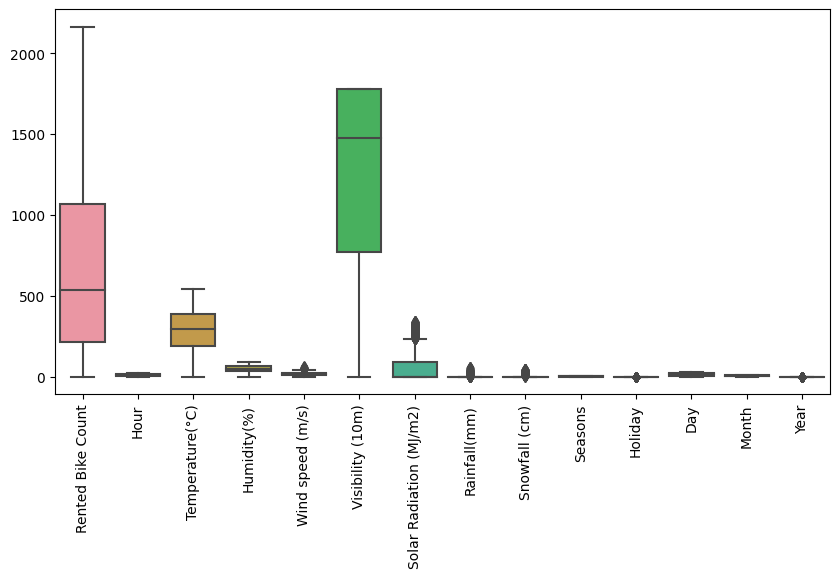

In [ ]:
#checking for outliers
plt.figure(figsize=(10,5))
plt.xticks(rotation =90)
sns.boxplot(data = label_df)
plt.show()

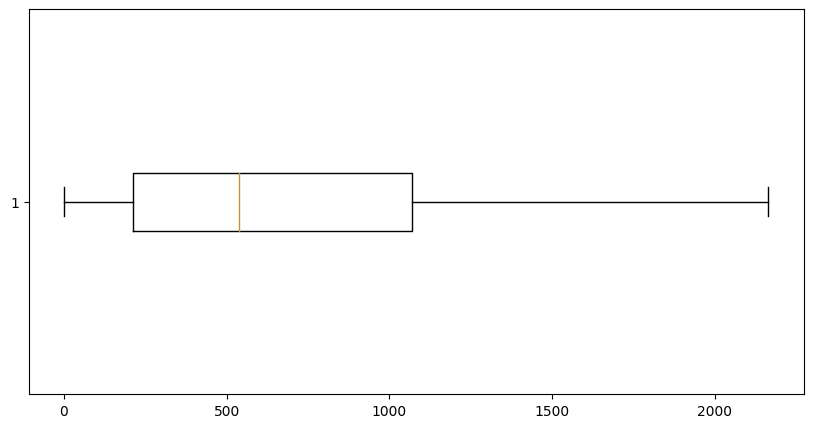

In [ ]:
#Target Parameter Rented Bike Count distributation analysis

plt.figure(figsize=(10,5))
plt.boxplot(label_df['Rented Bike Count'],vert=False)
plt.show()


In [ ]:
import scipy.stats as stats

In [ ]:
#to check the linearity in rented bike count
def plotvariable(Bike_data,variable):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)   #means 1 row, 2 Columns and 1st plot
  Bike_data[variable].hist(bins=30)

  ##QQ plot
  plt.subplot(1,2,2)
  stats.probplot(Bike_data[variable], dist='norm',plot=plt)
  plt.show()

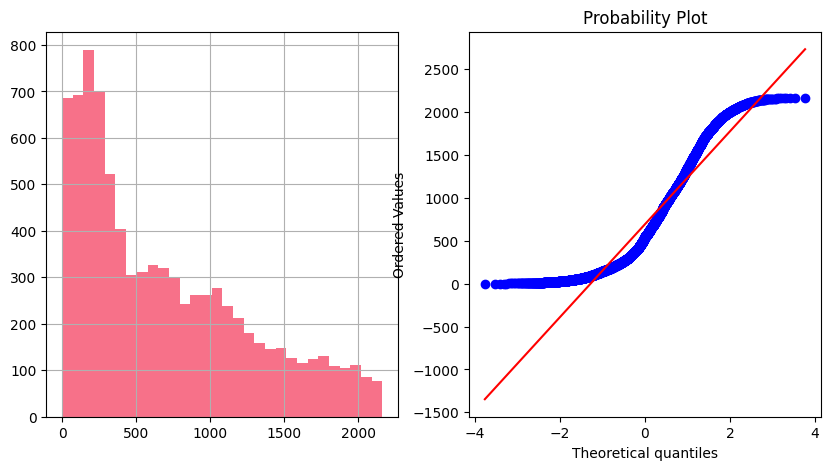

In [ ]:
#checking linearity in rented bike count
plotvariable(label_df,'Rented Bike Count')

 Rented Bike Count target is not normally distributed ,so we need to make some transformations before supply to the model

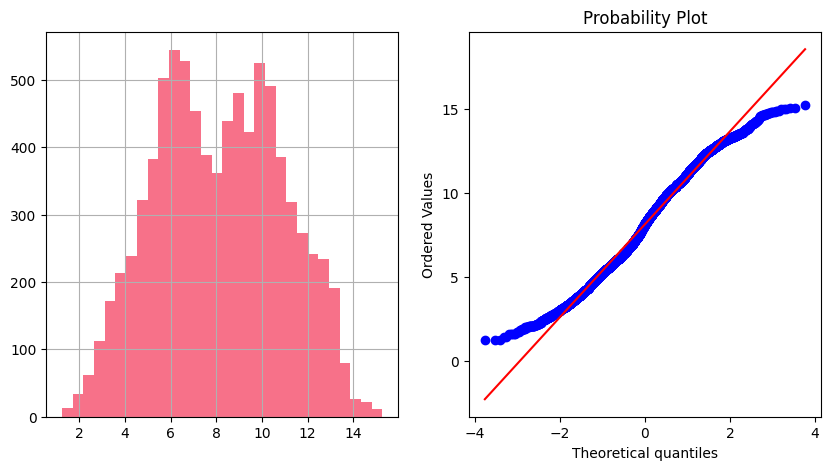

In [ ]:
#applying cube root transformation to rented bike count
Bike_data["RBC_qb"]=np.cbrt(Bike_data['Rented Bike Count']) #try cube root technique to convert positive screwd to normal distributation

plotvariable(Bike_data,"RBC_qb")

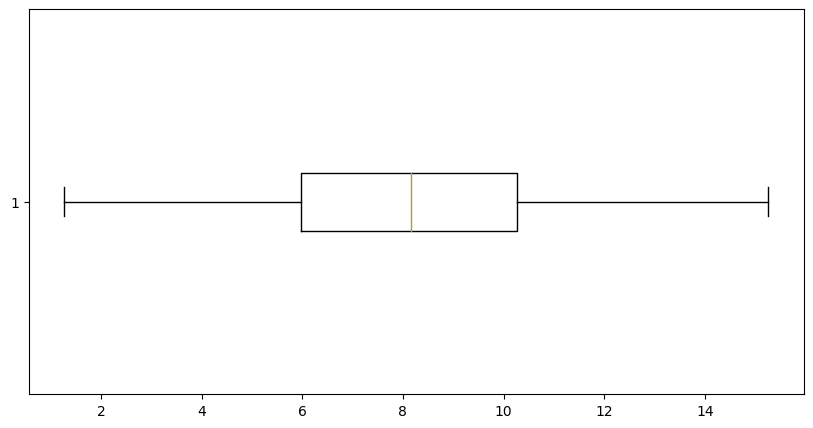

In [ ]:
#boxplot to show rBC_qb
plt.figure(figsize=(10,5))
plt.boxplot(Bike_data["RBC_qb"],vert=False)
plt.show()

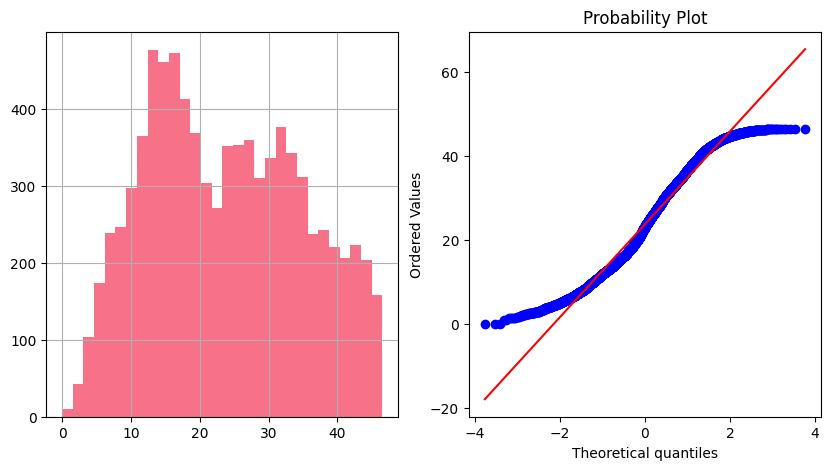

In [ ]:
#applying squart root transformation to  rented bike count
label_df['Rented Bike Count']=np.sqrt(label_df['Rented Bike Count'])

plotvariable(label_df,'Rented Bike Count')

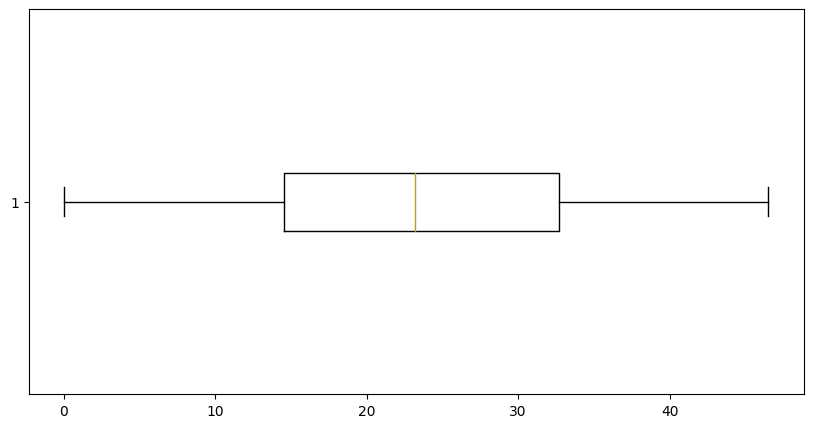

In [ ]:
#box plot to show rented bike count
plt.figure(figsize=(10,5))
plt.boxplot(label_df["Rented Bike Count"],vert=False)
plt.show()

Now, Its Look Like Normal Distributation

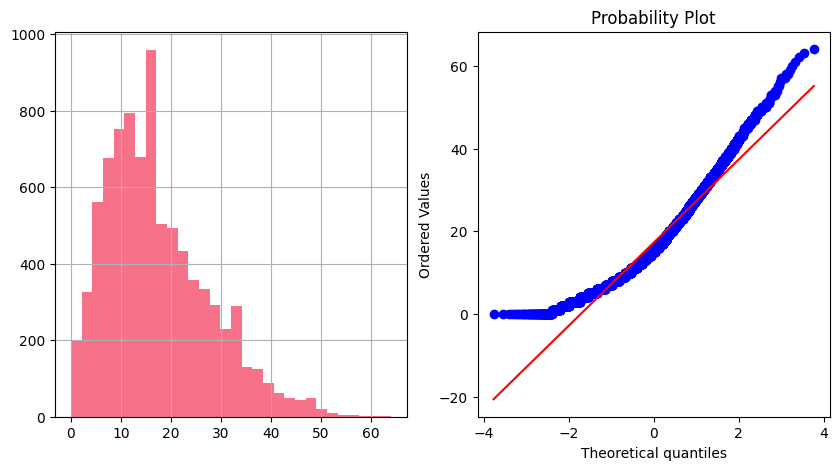

In [ ]:
#checking the linearity of wind speed
plotvariable(label_df,'Wind speed (m/s)')

not look like normal and right screwed distributation so need to apply transformation

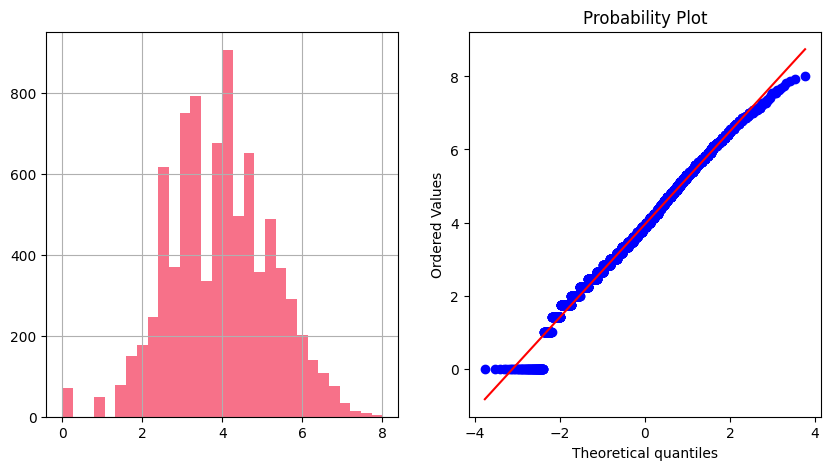

In [ ]:
#applying squareroot transformation to wind speed
label_df['Wind speed (m/s)']=np.sqrt(label_df['Wind speed (m/s)'])

plotvariable(label_df,'Wind speed (m/s)')

look like a normal distribution.

### Outline detection using Interquartile Range

**Square Root**The square root method is typically used when your data is moderately skewed. Now using the square root (e.g., sqrt(x)) is a transformation that has a moderate effect on distribution shape. It is generally used to reduce right skewed data. Finally, the square root can be applied on zero values and is most commonly used on counted data.

Square Root Transformation: Transform the values from y to √y.

**Log Transformation** The logarithmic is a strong transformation that has a major effect on distribution shape. This technique is, as the square root method, oftenly used for reducing right skewness. Worth noting, however, is that it can not be applied to zero or negative values.

Log Transformation: Transform the values from y to log(y).

**Cube root transformation**involves converting x to x^ (1/3). This is a fairly strong transformation with a substantial effect on distribution shape: but is weaker than the logarithm. It can be applied to negative and zero values too. Negatively skewed data

Cube Root Transformation: Transform the values from y to y^(1/3).

Text(0.5, 1.0, 'cube root')

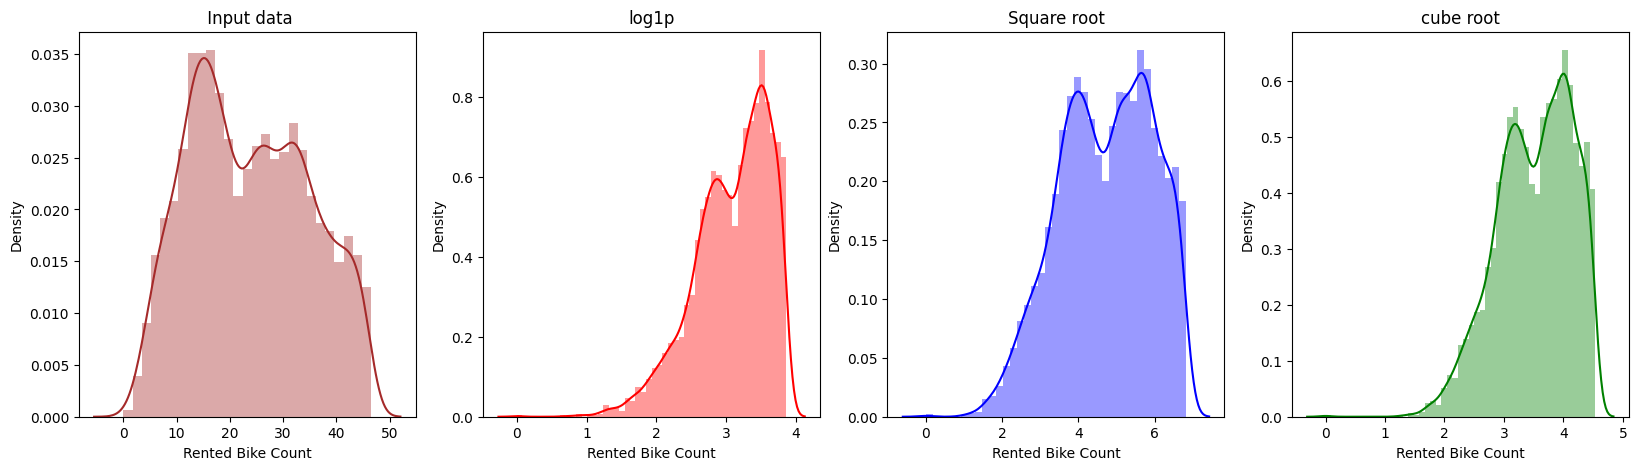

In [ ]:
#apply diffrent tranformation technique and checking data distributation
fig,axes = plt.subplots(1,4,figsize=(20,5))
sns.distplot((label_df['Rented Bike Count']),ax=axes[0],color='brown').set_title(" Input data")
sns.distplot(np.log1p(label_df['Rented Bike Count']+0.0000001),ax=axes[1],color='red').set_title("log1p") #transform only posible in positive value and >0 value so add 0.0000001 in data
sns.distplot(np.sqrt(label_df['Rented Bike Count']),ax=axes[2], color='blue').set_title("Square root")
sns.distplot(np.cbrt(label_df['Rented Bike Count']*2),ax=axes[3], color='green').set_title("cube root")

# **Spliting Training and Testing Set**

In [ ]:
#defining X and y variable or independent and dependent variable
X=label_df.drop('Rented Bike Count',axis=1)
y=label_df['Rented Bike Count']

In [ ]:
#spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
#Let's check the shape of the train and test dataset

print(f'The shape of the train and test set for the independent variables are : X_train = {X_train.shape}, xX_test = {X_test.shape}')
print(f'The shape of the train and test set for the dependent variables are : y_train = {y_train.shape}, y_test = {y_test.shape}')

The shape of the train and test set for the independent variables are : X_train = (6772, 13), xX_test = (1693, 13)
The shape of the train and test set for the dependent variables are : y_train = (6772,), y_test = (1693,)


In [ ]:
X_train[0:10]

Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
8691     3              198           29          4.000000               744   
6042    18              444           77          4.795832              1055   
4788    12              447           36          4.690416               508   
6574    22              404           71          3.000000              1632   
3716    20              304           37          5.830952              1719   
2173    13              177           28          6.324555              1465   
1583    23               60           39          4.472136              1779   
1412    20               93           21          5.291503              1779   
7934    14              271           28          6.633250              1779   
7594    10              289           41          3.741657              1495   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Seasons  Holiday  \
8691                        0             0              0        0        1   
6042                       28             5              0        2        1   
4788                      292             0              0        2        1   
6574                        0             0              0        2        1   
3716                        1             0              0        1        1   
2173                      295             0              0        1        0   
1583                        0             0              0        3        1   
1412                        0             0              0        3        1   
7934                      129             0              0        0        1   
7594                      168             0              0        0        1   

      Day  Month  Year  
8691   27     10     1  
6042    7      8     1  
4788   17      5     1  
6574   30      7     1  
3716    4      3     1  
2173    2      0     1  
1583    1      3     1  
1412   27      0     1  
7934   26      9     1  
7594   12      9     1

In [ ]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

6772
6772
1693
1693


# **Model selection and training**

# Linear Regression :
Considering that we are tackling a regression problem, a good start is to fit a linear regression model.

Linear regression is a statistical method used for modeling the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data. It is a fundamental technique in the field of statistics and machine learning for predicting or understanding the relationship between variables.

In simple linear regression, there is a single independent variable and a single dependent variable. The goal is to find the best-fitting linear line (or hyperplane, in higher dimensions) that minimizes the difference between the predicted values and the actual observed values.

In [ ]:
def predict(ml_model,x,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)
    rob =RobustScaler()

    x_train = rob.fit_transform(X_train)
    x_test = rob.transform(X_test)

    model=ml_model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    plt.scatter(y_pred,y_test,color='b')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    print(f'R^2 is {model.score(x_test,y_test)}\n Adj R^2 is {1-(1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}\n RMSE is: {mean_squared_error(y_test,y_pred,squared=False)}')


R2 shows how well terms (data points) fit a curve or line. Adjusted R2 also indicates how well terms fit a curve or line, but adjusts for the number of terms in a model. If you add more and more useless variables to a model, adjusted r-squared will decrease. If you add more useful variables, adjusted r-squared will increase.

Adjusted R2 will always be less than or equal to R2.

R2 assumes that every single variable explains the variation in the dependent variable.

The adjusted R2 tells you the percentage of variation explained by only the independent variables that actually affect the dependent variable.

MSE is a risk function that allows us to calculate the average squared difference between a feature’s or variable’s predicted and actual value.

RMSE is an abbreviation for Root Mean Square Error, which is the square root of the value obtained from the Mean Square Error function.

R^2 is -1.2015642002526863
 Adj R^2 is 0.6456800681052435
 RMSE is: 6.782028398532068


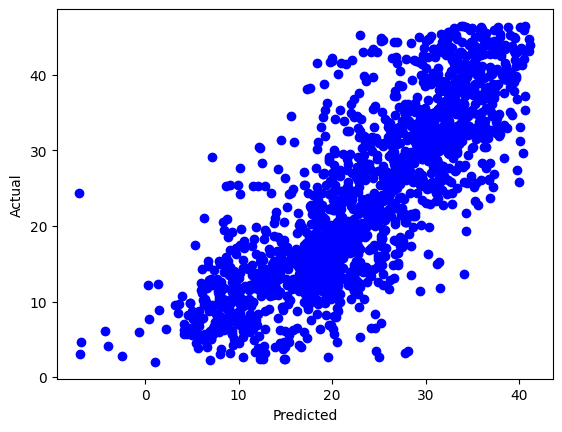

In [ ]:
predict(LinearRegression(),X,y)

# Decision Tree Regressor :

Decision tree is a type of supervised learning algorithm that is mostly used in classification problems. It works for both categorical and continuous input and output variables.

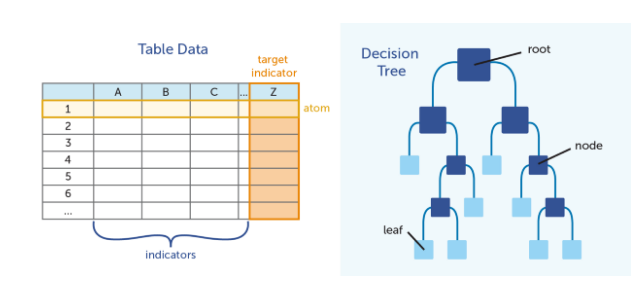

R^2 is -0.030097539314219324
 Adj R^2 is 0.7989389015788738
 RMSE is: 5.108881595397629


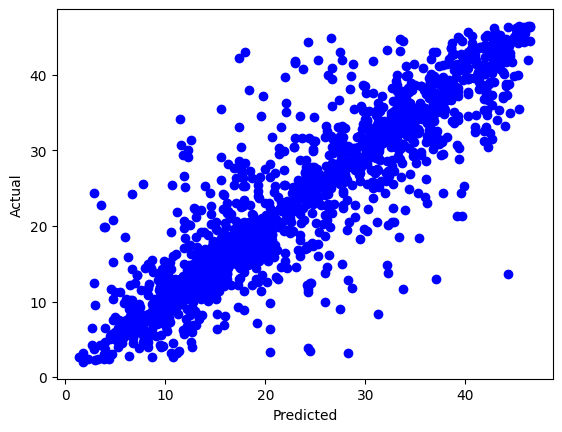

In [ ]:
predict(DecisionTreeRegressor(),X,y)

# Random Forest Regressor:

A Random Forest is a powerful ensemble learning method used in machine learning for both classification and regression tasks. It is based on the idea of combining multiple individual decision trees to create a more accurate and robust model. Random Forests mitigate some of the limitations of a single decision tree, such as overfitting and sensitivity to small changes in the data.

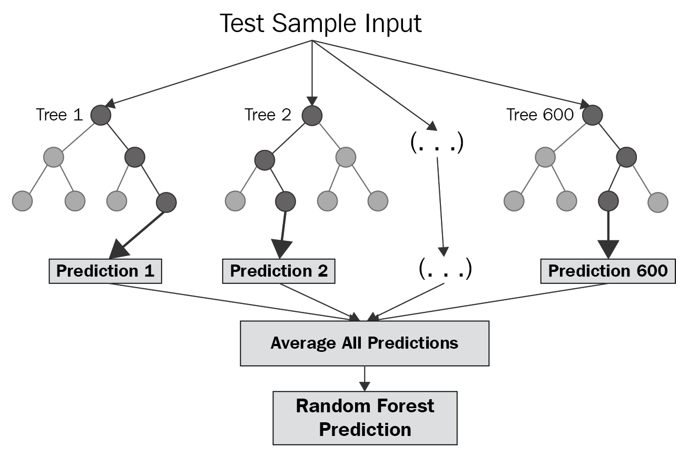

R^2 is -0.003987353720159348
 Adj R^2 is 0.9011148518055732
 RMSE is: 3.582839441211846


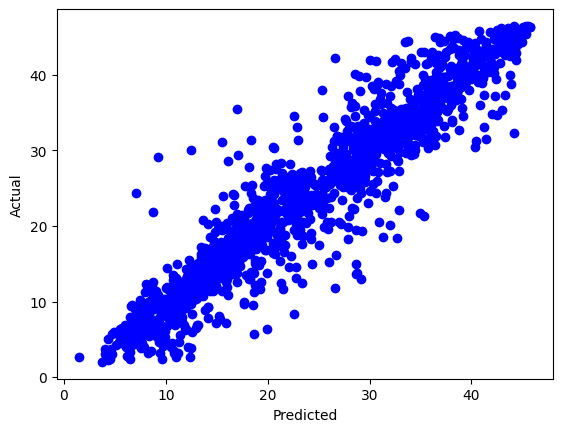

In [ ]:
predict(RandomForestRegressor(),X,y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000634 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1044
[LightGBM] [Info] Number of data points in the train set: 6772, number of used features: 13
[LightGBM] [Info] Start training from score 23.784708
R^2 is -0.45618943444240334
 Adj R^2 is 0.9073367964618475
 RMSE is: 3.468290507909401


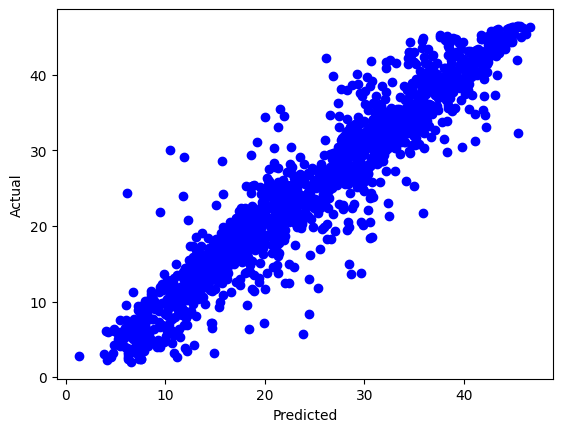

In [ ]:
predict(LGBMRegressor(),X,y)

## Models Accuracy Checking Using MinMaxScaler

For normalization, we use MinMaxScaler



In [ ]:
def predict_mm(ml_model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)
    mm =MinMaxScaler()

    X_train = mm.fit_transform(X_train)
    X_test = mm.transform(X_test)

    model=ml_model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    plt.scatter(y_pred,y_test,color='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    print(f'R^2 is {model.score(X_test,y_test)}\n Adj R^2 is {1-(1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}\n RMSE is: {mean_squared_error(y_test,y_pred,squared=False)}')


R^2 is 0.6484023843668462
 Adj R^2 is 0.6456800681052435
 RMSE is: 6.782028398532068


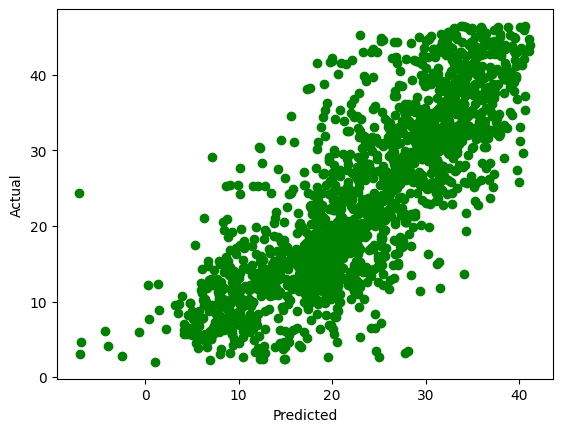

In [ ]:
predict_mm(LinearRegression(),X,y)

R^2 is 0.798107636461272
 Adj R^2 is 0.7965444436524551
 RMSE is: 5.139212664828074


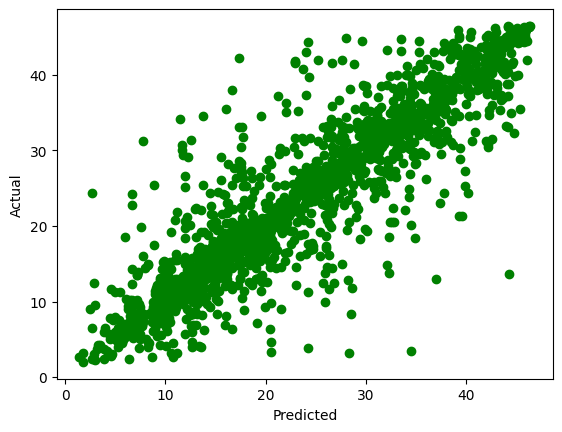

In [ ]:
predict_mm(DecisionTreeRegressor(),X,y)

R^2 is 0.9008169630086851
 Adj R^2 is 0.9000490181123855
 RMSE is: 3.602096509399255


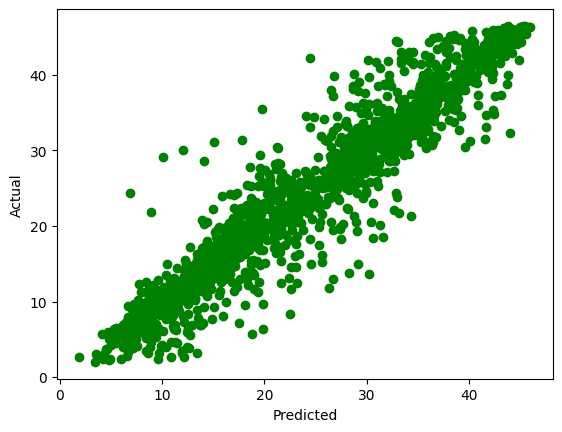

In [ ]:
predict_mm(RandomForestRegressor(),X,y)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000931 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1044
[LightGBM] [Info] Number of data points in the train set: 6772, number of used features: 13
[LightGBM] [Info] Start training from score 23.784708
R^2 is 0.9086899452289576
 Adj R^2 is 0.9079829585035117
 RMSE is: 3.4561767553073417


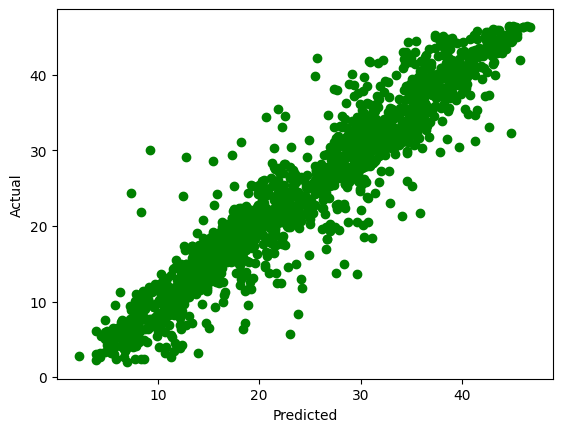

In [ ]:
predict_mm(LGBMRegressor(),X,y)

## Models Accuracy Checking Using Standard Scaler

For standardization, we use StandardScaler. This is a technique commonly used in data preprocessing and feature scaling in machine learning

In [ ]:
def predict_ss(ml_model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)
    ss =StandardScaler()

    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test)

    model=ml_model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    plt.scatter(y_pred,y_test,color='r')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    print(f'R^2 is {model.score(X_test,y_test)} \n Adj R^2 is {1-(1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}\n RMSE is: {mean_squared_error(y_test,y_pred,squared=False)}')
    pred_y_df=pd.DataFrame({"Actual Value":y_test,"Predicted Value":y_pred,"Difference":y_test-y_pred})
    print(pred_y_df[0:10])

Checking Actual value and Predicated value with it's differenace

R^2 is 0.6484023843668462 
 Adj R^2 is 0.6456800681052435
 RMSE is: 6.782028398532068
      Actual Value  Predicted Value  Difference
5028     33.749074        29.317478    4.431596
5121     11.224972         9.318051    1.906921
4191     33.955854        34.200968   -0.245115
8498     16.852300        19.913517   -3.061218
8072     41.713307        19.744203   21.969104
3300     33.075671        30.792839    2.282832
1461      7.615773         5.867516    1.748257
1324      4.472136         5.409999   -0.937863
8128     39.862263        36.828032    3.034231
16       21.931712        18.670651    3.261061


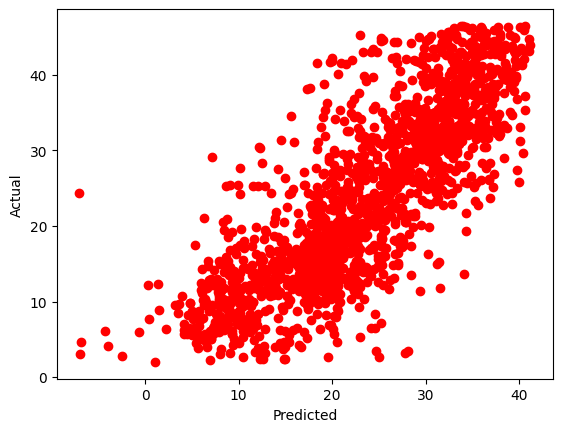

In [ ]:
predict_ss(LinearRegression(),X,y)

R^2 is 0.8024107041147278 
 Adj R^2 is 0.8008808286850027
 RMSE is: 5.084149940366899
      Actual Value  Predicted Value  Difference
5028     33.749074        32.741411    1.007663
5121     11.224972         5.000000    6.224972
4191     33.955854        36.905284   -2.949430
8498     16.852300        18.248288   -1.395988
8072     41.713307        22.934690   18.778617
3300     33.075671        30.248967    2.826704
1461      7.615773         8.366600   -0.750827
1324      4.472136         5.656854   -1.184718
8128     39.862263        34.423829    5.438434
16       21.931712        22.248595   -0.316883


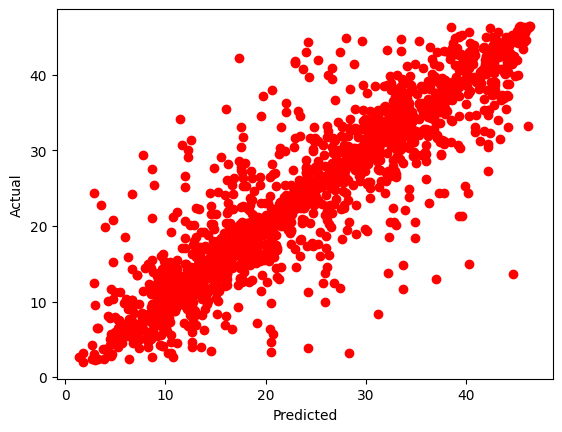

In [ ]:
predict_ss(DecisionTreeRegressor(),X,y)

R^2 is 0.9002813531881912 
 Adj R^2 is 0.8995092612235971
 RMSE is: 3.6118094635933393
      Actual Value  Predicted Value  Difference
5028     33.749074        31.995103    1.753971
5121     11.224972         7.726947    3.498026
4191     33.955854        36.467995   -2.512141
8498     16.852300        17.058407   -0.206107
8072     41.713307        34.712160    7.001147
3300     33.075671        32.323191    0.752480
1461      7.615773         8.732345   -1.116572
1324      4.472136         5.562735   -1.090599
8128     39.862263        36.807027    3.055236
16       21.931712        20.985768    0.945944


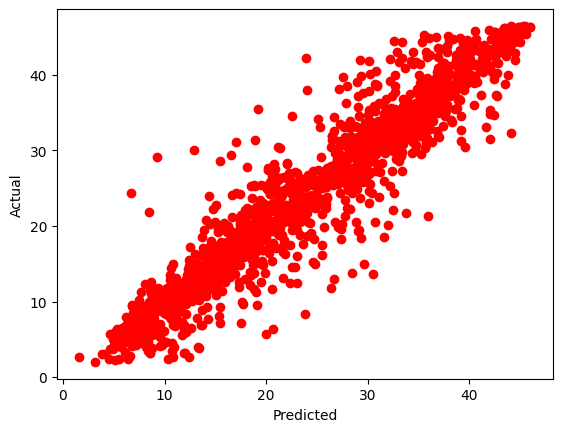

In [ ]:
predict_ss(RandomForestRegressor(),X,y)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1050
[LightGBM] [Info] Number of data points in the train set: 6772, number of used features: 13
[LightGBM] [Info] Start training from score 23.784708
R^2 is 0.9070138170111401 
 Adj R^2 is 0.9062938525210537
 RMSE is: 3.487754065892132
      Actual Value  Predicted Value  Difference
5028     33.749074        31.984073    1.765001
5121     11.224972         7.738305    3.486668
4191     33.955854        38.245208   -4.289355
8498     16.852300        16.871841   -0.019541
8072     41.713307        32.376403    9.336904
3300     33.075671        31.743416    1.332255
1461      7.615773         6.103525    1.512248
1324      4.472136         5.273349   -0.801213
8128     39.862263        37.596787    2.265476
16       21.931712       

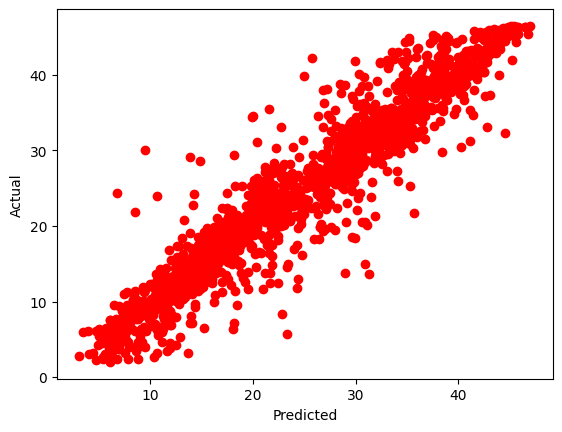

In [ ]:
predict_ss(LGBMRegressor(),X,y)

Let's evaluate all accuraracy data at one place

In [ ]:
import lightgbm
import time
from math import sqrt
from sklearn import preprocessing, model_selection, metrics
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
models = [
           ['LinearRegression: ',              LinearRegression()],
           ['Lasso: ',                         Lasso()],
           ['Ridge: ',                         Ridge()],
           ['KNeighborsRegressor: ',           neighbors.KNeighborsRegressor()],
           ['SVR:' ,                           SVR(kernel='rbf')],
           ['DecisionTree ',                   DecisionTreeRegressor(random_state=42)],
           ['RandomForest ',                   RandomForestRegressor(random_state=42)],
           ['ExtraTreeRegressor :',            ExtraTreesRegressor(random_state=42)],
           ['GradientBoostingRegressor: ',     GradientBoostingRegressor(random_state=42)],
           ['XGBRegressor: ',                  xgb.XGBRegressor(random_state=42)] ,
           ['Light-GBM: ',                     lightgbm.LGBMRegressor(num_leaves=41, n_estimators=200,random_state=42)],
           ['MLPRegressor: ', MLPRegressor(  activation='logistic', solver='sgd',learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.01)]
]

In [ ]:
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train,y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000981 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1039
[LightGBM] [Info] Number of data points in the train set: 6772, number of used features: 13
[LightGBM] [Info] Start training from score 23.796232


In [ ]:
model_data

[{'Name': 'LinearRegression: ',
  'Train_Time': 0.008594512939453125,
  'Train_R2_Score': 0.6478907877040745,
  'Test_R2_Score': 0.6583635068923448,
  'Test_RMSE_Score': 6.4352389952296525},
 {'Name': 'Lasso: ',
  'Train_Time': 0.00861668586730957,
  'Train_R2_Score': 0.6362247150339719,
  'Test_R2_Score': 0.6434832997542703,
  'Test_RMSE_Score': 6.573890897623658},
 {'Name': 'Ridge: ',
  'Train_Time': 0.006999492645263672,
  'Train_R2_Score': 0.6478907426327043,
  'Test_R2_Score': 0.6583560977217399,
  'Test_RMSE_Score': 6.435308776306985},
 {'Name': 'KNeighborsRegressor: ',
  'Train_Time': 0.026798725128173828,
  'Train_R2_Score': 0.7595401403043068,
  'Test_R2_Score': 0.634924859314125,
  'Test_RMSE_Score': 6.65232844723656},
 {'Name': 'SVR:',
  'Train_Time': 1.6942780017852783,
  'Train_R2_Score': 0.45718840668401606,
  'Test_R2_Score': 0.4651504542193533,
  'Test_RMSE_Score': 8.051899927587922},
 {'Name': 'DecisionTree ',
  'Train_Time': 0.043268442153930664,
  'Train_R2_Score': 1

## Compare Models Accuracy

In [ ]:
df_all_model=pd.DataFrame(model_data)
df_all_model

Name  Train_Time  Train_R2_Score  Test_R2_Score  \
0            LinearRegression:     0.008595        0.647891       0.658364   
1                       Lasso:     0.008617        0.636225       0.643483   
2                       Ridge:     0.006999        0.647891       0.658356   
3         KNeighborsRegressor:     0.026799        0.759540       0.634925   
4                          SVR:    1.694278        0.457188       0.465150   
5                 DecisionTree     0.043268        1.000000       0.796217   
6                 RandomForest     2.709142        0.985689       0.888823   
7          ExtraTreeRegressor :    1.870717        1.000000       0.895523   
8   GradientBoostingRegressor:     0.893459        0.888886       0.872145   
9                XGBRegressor:     0.538134        0.977729       0.898301   
10                  Light-GBM:     0.191949        0.970815       0.907160   
11               MLPRegressor:     2.435042        0.046814       0.043449   

    Test_RMSE_Score  
0          6.435239  
1          6.573891  
2          6.435309  
3          6.652328  
4          8.051900  
5          4.970115  
6          3.671046  
7          3.558714  
8          3.936779  
9          3.511089  
10         3.354671  
11        10.768041

As per above results Train and Test R2 Score is nearby in good model.

Near 1 Score is very good model.

So, In above results best models are :

No	Model Name	Model Accuracy Score in %

6. RandomForest - 88%

7.	ExtraTreeRegressor - 89%

8.	GradientBoostingRegressor - 87%

9.	XGBRegressor - 87%
10.	Light-GBM	- 90%

# **HyperParameter Tuning**
Apply on GradientBoostingRegressor Model and improve Accuracy of Model.

### Choose the best Hyperparameters

It’s a bit confusing to choose the best hyperparameters for boosting. But once you know how the boosting algorithms work, then you are able to choose it. Here are the best ones that I have chosen, learning_rate, max_depth, and the n_estimators. The max_depth and n_estimators are also the same parameters we chose in a random forest. Here we are taking an extra that is the learning_rate.

Call the Boosting regressor constructor and define the parameters. Here we will make the list of all possibilities for each of the Hyperparameters.

In [ ]:
gbr = GradientBoostingRegressor()
gbr_params = {
    "n_estimators":[250,500,1000],
    "max_depth":[2,4,6],
    "learning_rate":[0.01,0.1,1],
    "loss": ['ls','huber','quantile'],
}

In [ ]:
#apply boosting regressor
regressor = GridSearchCV(gbr, gbr_params, verbose=1,cv=3,n_jobs=-1)
regressor.fit(X_train,y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'loss': ['ls', 'huber', 'quantile'],
                         'max_depth': [2, 4, 6],
                         'n_estimators': [250, 500, 1000]},
             verbose=1)

In [ ]:
regressor.best_params_        #view selected best parameter by model

{'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 6, 'n_estimators': 250}

In [ ]:
regressor.best_estimator_

GradientBoostingRegressor(loss='huber', max_depth=6, n_estimators=250)

In [ ]:
predictions = regressor.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('Root Mean Squared Error is {:.4f} '.format(np.sqrt(mean_squared_error(y_test,
                                                    regressor.predict(X_test)))) )

Root Mean Squared Error is 3.4599 


In [ ]:
#Now apply best selected paramter and checking result

X=label_df.drop('Rented Bike Count',axis=1)
y=label_df['Rented Bike Count']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
#
# Standardize the dataset
#
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
#
# Hyperparameters for GradientBoostingRegressor
#
gbr_params = {'n_estimators': 1000,
          'max_depth': 6,
          'min_samples_split': 10,
          'learning_rate': 0.1,
          'loss': 'huber'}
#
# Create an instance of gradient boosting regressor
#
gbr = GradientBoostingRegressor(**gbr_params)
#
# Fit the model
#
gbr.fit(X_train_std, y_train)
#
# Print Coefficient of determination R^2
#
print("Model Accuracy: %.3f" % gbr.score(X_test_std, y_test))
#
# Create the mean squared error
#
mse = mean_squared_error(y_test, gbr.predict(X_test_std))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print('Root Mean Squared Error is {:.4f} '.format(np.sqrt(mean_squared_error(y_test,
                                                    regressor.predict(X_test)))) )


Model Accuracy: 0.903
The mean squared error (MSE) on test set: 11.7261
Root Mean Squared Error is 3.4599 


## Hyperparameter Tuning Using Grid Search Cross-Validation

A common use of cross-validation is for tuning hyperparameters of a model. The most common technique is what is called grid search cross-validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE

# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 14))}]

#
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
#

# step-3: perform grid search
# Create an instance of gradient boosting regressor
#
gbr = GradientBoostingRegressor()
#
# Fit the model
#
gbr.fit(X_train_std, y_train)
rfe = RFE(gbr)

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, param_grid = hyper_params, scoring= 'r2', cv = folds,  verbose = 1, return_train_score=True)

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=GradientBoostingRegressor()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             return_train_score=True, scoring='r2', verbose=1)

In [ ]:
model_cv.best_params_

{'n_features_to_select': 9}

In [ ]:
model_cv.best_estimator_

RFE(estimator=GradientBoostingRegressor(), n_features_to_select=9)

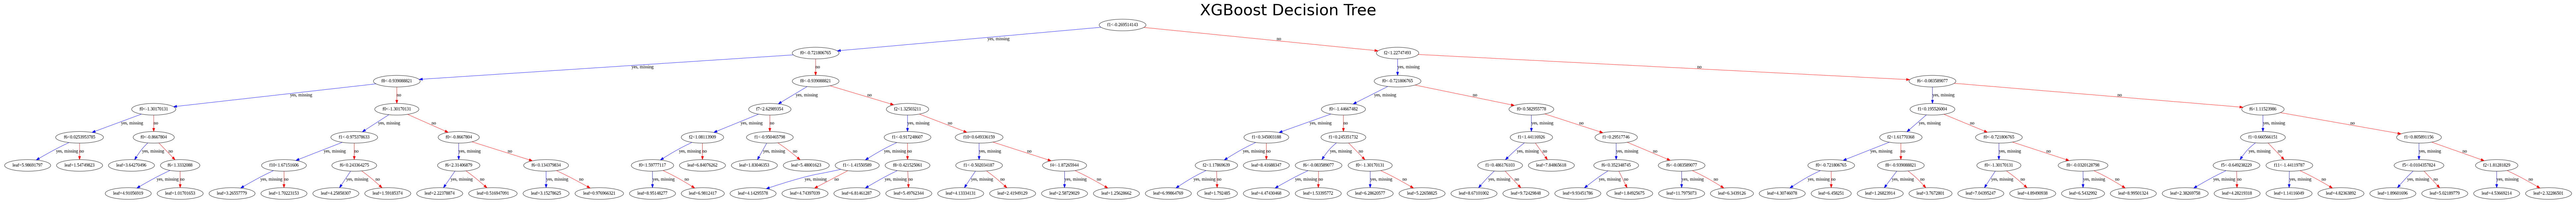

In [ ]:
# plot decision tree
from xgboost import XGBRegressor
from xgboost import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import graphviz

# data preparation code
X = label_df.drop('Rented Bike Count', axis=1)
y = label_df['Rented Bike Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Standardize the dataset
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Fit the model on training data
model = XGBRegressor()
model.fit(X_train_std, y_train)

# Plot single tree with customization using graphviz
plot_tree(model, num_trees=0, rankdir='RR')  # num_trees=0 plots the first tree in the ensemble

#plot the tree
fig = plt.gcf()
fig.set_size_inches(100, 100)
plt.title('XGBoost Decision Tree', fontsize=34)
plt.show()


In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        6.246033      0.124143         0.004566        0.000530   
1        6.063956      0.112182         0.005467        0.000425   
2        5.765397      0.128620         0.005213        0.000386   
3        5.473652      0.131423         0.005020        0.000309   
4        5.140615      0.150833         0.004992        0.000436   
5        4.779793      0.146154         0.004958        0.000318   
6        4.384682      0.151690         0.005271        0.000339   
7        3.890886      0.115738         0.006701        0.002307   
8        3.355323      0.085524         0.005286        0.000633   
9        2.794386      0.130122         0.005335        0.000453   
10       2.197805      0.100827         0.005394        0.000254   
11       1.513010      0.095991         0.005866        0.001730   
12       0.735467      0.011461         0.004941        0.000090   

   param_n_features_to_select                        params  \
0                           1   {'n_features_to_select': 1}   
1                           2   {'n_features_to_select': 2}   
2                           3   {'n_features_to_select': 3}   
3                           4   {'n_features_to_select': 4}   
4                           5   {'n_features_to_select': 5}   
5                           6   {'n_features_to_select': 6}   
6                           7   {'n_features_to_select': 7}   
7                           8   {'n_features_to_select': 8}   
8                           9   {'n_features_to_select': 9}   
9                          10  {'n_features_to_select': 10}   
10                         11  {'n_features_to_select': 11}   
11                         12  {'n_features_to_select': 12}   
12                         13  {'n_features_to_select': 13}   

    split0_test_score  split1_test_score  split2_test_score  \
0            0.361295           0.402071           0.365298   
1            0.666478           0.681032           0.646984   
2            0.837312           0.845702           0.825117   
3            0.854930           0.857201           0.861026   
4            0.871436           0.869526           0.873841   
5            0.870642           0.872383           0.874643   
6            0.873937           0.872934           0.876096   
7            0.876287           0.875303           0.880059   
8            0.880944           0.879237           0.883395   
9            0.878432           0.878118           0.881743   
10           0.879272           0.878714           0.882501   
11           0.879100           0.878525           0.881189   
12           0.878331           0.879722           0.880527   

    split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0            0.376353           0.355651         0.372134        0.016431   
1            0.638830           0.633079         0.653281        0.017894   
2            0.803386           0.809731         0.824250        0.015985   
3            0.831228           0.834339         0.847745        0.012409   
4            0.853878           0.856945         0.865125        0.008107   
5            0.857636           0.859326         0.866926        0.007031   
6            0.859884           0.859099         0.868390        0.007341   
7            0.863101           0.862355         0.871421        0.007277   
8            0.867420           0.864807         0.875161        0.007550   
9            0.866064           0.863723         0.873616        0.007272   
10           0.865493           0.863981         0.873992        0.007682   
11           0.862834           0.863333         0.872996        0.008144   
12           0.864781           0.862160         0.873104        0.007941   

    rank_test_score  split0_train_score  split1_train_score  \
0                13            0.404222            0.391979   
1                12            0.669658            0.665498   
2                

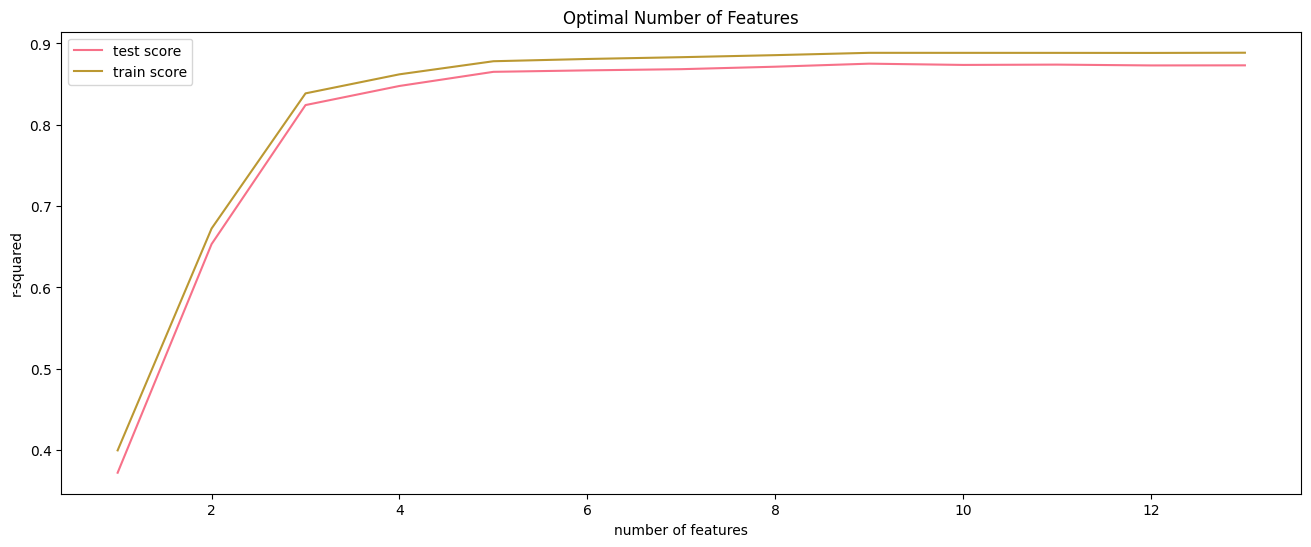

In [ ]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

# **CONCLUSION**
In the course of this extensive machine learning project, we systematically evaluated a diverse array of regression models to ascertain the optimal fit for our dataset. Through rigorous accuracy analysis, our comprehensive examination led us to a compelling conclusion: LightGBM emerges as the most suitable choice, showcasing a remarkable accuracy score approaching 90%. Impressively, LightGBM also exhibits superior error mitigation capabilities when compared to its counterparts.

Our commitment to excellence did not end with model selection; it extended into the realm of hyperparameter tuning. As a result of these efforts, the Gradient Boosting technique, post-tuning, reemerged as a formidable contender. With an accuracy score hovering around 89%, it closely rivals LightGBM in terms of performance. Furthermore, this revitalized Gradient Boosting technique maintains a similarly low error rate, validating its efficacy.

In summation, our exhaustive exploration validates LightGBM as the foremost choice for our dataset, boasting impressive accuracy and minimal error. Additionally, the resurgence of Gradient Boosting, post-hyperparameter tuning, highlights the transformative potential of meticulous model refinement. This comprehensive analysis culminates in the selection of LightGBM as the optimal model for our machine learning project.